---

Title: Section C

Author: Ali Suhail

Date: 2024-11-14

---

# **Section C, Activity 2**

## Instructions on how to run this notebook
To run the `Section-C-Markdown.ipynb` notebook follow the instructions below:

- **Step 1**: Open Visual Studio Code (VSC) or other preferred IDEs.

- **Step 2**: Select `C_code` folder.

- **Step 3**: Create a virtual environment and select it as a python interpreter. 
    - Example code: `python -m venv env`

- **Step 4**: Then activate the virtual environment.
    - Example code: `.\env\Scripts\activate`

- **Step 5**: Install the following libraries:
    - `pip install pandas`
    - `pip install numpy`
    - `pip install matplotlib`
    - `pip install seaborn`
    - `pip install wordcloud`
    - `pip install geopandas`
    - `pip install folium`
    - `pip install scikit-learn`

- **Step 6**: Run the notebook (should take around 5 minutes to run).

- **Step 7**: Enjoy!


# (Q1)
# Data Scientist Salary Prediction

For this project, I chose to analyze the **Latest Data Science Salaries** dataset, which provides valuable insights into salary trends in the data science field from 2020 to 2024. This dataset includes comprehensive salary information across different industries, company sizes, and geographic regions, allowing us to explore the main factors influencing salaries within data science roles over this period. The data encompasses key attributes such as job roles, experience levels, educational backgrounds, and locations, giving us a rich foundation for building a predictive model.

The dataset can be accessed on **Kaggle** and originates from [AI Jobs](https://ai-jobs.net/). The Kaggle dataset can be found here: [Data Science Salaries 2023](https://www.kaggle.com/datasets/iamsouravbanerjee/data-science-salaries-2023/data).

The goal is to predict salaries using specific features from the dataset, employing two machine learning models: **Linear Regression (LR)** and **Random Forest Regression (RFR)**. While RFR will serve as the primary model, LR will be utilized for performance comparison.

These models have been chosen because salary prediction is a regression problem and the goal is to estimate a continuous numerical value **Salary** based on various input features like **experience level**, **job title**, **company size**, **company location**, etc. Regression models are designed to identify relationships between these features (independent variables) and the target variable (**Salary**), making them suitable for predicting a continuous outcome (Bobbitt, 2020). By comparing the performance of these models, I aim to assess how different learning techniques (with different hyperparameters) perform for salary prediction, particularly in the context of potentially complex and non-linear relationships within the data.

Let's briefly discuss Random Forest Regression and Linear Regression, focusing on how each model can be applied to salary prediction, and outline the assumptions, advantages, and limitations of each model, delve into their training algorithms, and investigate optimal approaches for train-test splitting. We will also explore how these models use test data to make predictions.

## Random Forest Regression (RFR) and Assumptions for Salary Prediction

Random Forest is an ensemble learning model that leverages multiple decision trees to predict salaries. Each tree is trained on a random subset of the data, which allows the model to capture complex and non-linear relationships between the features. After training, the individual predictions from all the decision trees are aggregated, typically by averaging, to generate a final prediction (IBM, 2021). Since this is a regression task, averaging the outputs from each tree provides a more robust and accurate prediction for salary, reducing the risk of overfitting and improving the model's performance. This approach enables the model to identify intricate patterns in the data, making it well-suited for tasks like salary prediction.

One of the primary advantages of Random Forest is its ability to model non-linear relationships between features. This is particularly useful in salary prediction, where the relationship between some variables may not follow a simple linear pattern. The model also benefits from being less sensitive to outliers. Since the final prediction is based on the average of multiple decision trees, any extreme values in the data are less likely to distort the model’s predictions. In addition, Random Forest can help identify which features are the most influential in predicting salaries, similar to how LR highlights the importance of specific variables.’

However, Random Forest does have its drawbacks. One significant disadvantage is its higher computational cost. Training multiple decision trees requires more memory and processing power (IBM, 2021). Furthermore, while Random Forest provides feature importance, it does not offer clear coefficients for each individual feature, making it less interpretable (IBM, 2021). This lack of transparency can make it harder to understand the precise impact of each feature on the salary prediction, as the model does not provide a straightforward, quantifiable relationship like LR does. It also assumes that enough trees are built to ensure stability and accuracy. Which is not true in most real world applications. Next, we will discuss Linear Regression (LR)

## Linear Regression (LR) and and Assumptions for Salary Prediction

Linear Regression (LR) is a widely used statistical model that predicts the value of a dependent variable (like salary) based on one or more independent variables (such as experience, job title, location etc). The model assumes a linear relationship between the input features and the output (Bevans, 2020). For salary prediction, LR would model how salary changes with respect to features like years of experience or job role.

Linear Regression works by finding the line (or hyperplane in higher dimensions) that best fits the data by minimizing the error between actual and predicted values. This makes it a simple yet effective method for predicting salary when the relationship between features and salary is straightforward and linear (Bevans, 2020).

Linear Regression is simple to implement and easy to interpret, making it ideal for understanding the relationship between features and salary, such as years of experience or job role. It works best when there is a clear linear relationship between independent variables (like experience) and the dependent variable (salary). The algorithm is computationally efficient and less complex compared to more advanced models like RFR (GeeksforGeeks, 2020), making it a good baseline for salary predictions.

However, a significant disadvantage is that LR struggles to capture non-linear relationships. If salary increases in a non-linear fashion relative to the features, LR may not perform well. Moreover, outliers like extreme salary values can distort the model's predictions and may lead to over or under fitting, reducing accuracy. Additionally, LR assumes feature independence, which isn't always the case in real-world data. Although regularization techniques and cross-validation can help reduce overfitting, the model may still oversimplify the relationship between variables, missing out on complex interactions that more advanced models like RF can capture (GeeksforGeeks, 2020).


## Conclusion
To summarise, once the models are trained, they can be used to predict salary for new data in the test set. LR applies the learned coefficients to calculate salary directly from the features. Random Forest, on the other hand, generates multiple predictions using the individual trees and averages them to arrive at the final prediction. By analyzing model performance on the test data, we can fine-tune hyperparameters and improve each model’s accuracy for salary prediction.

Now that we have discussed the workings of Random Forest Regression (RFR) and Linear Regression (LR), let's proceed with preparing, analyzing, cleaning, scaling, training, and evaluating the models using both LR and RFR.

# (Q2)

# Libraries

In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import geopandas as gpd
import folium
from IPython.display import display

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Functions

In [64]:
def count_bar_chart(data, xlabel, ylabel, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=data.index, y=data.values, palette='viridis', hue=data.index)
    plt.xticks(rotation=75)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add annotations
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black', fontsize=12)
    
    plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
    plt.show()

def double_bar_plot(data, col1, col2, title, col1_label, col2_label):
    # count the occurrences of each category in both columns
    data_count = pd.concat([data[col1].value_counts(), data[col2].value_counts()], axis=1).fillna(0)
    data_count.columns = [col1_label, col2_label] # rename columns for easier understanding
    
    data_count.plot(kind='bar', figsize=(10, 6), color=["skyblue", "orange"], width=0.8)
    plt.xlabel("Categories")
    plt.ylabel("Count")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(title="Levels", loc="upper right")
    plt.tight_layout()
    plt.show()

# Data Preparation & Analysis

In [65]:
data_science_df = pd.read_csv(r'.\v7_Latest_Data_Science_Salaries.csv')
data_science_df.head(5)

Job Title Employment Type Experience Level  \
0                    Data Engineer       Full-Time              Mid   
1                    Data Engineer       Full-Time              Mid   
2                     Data Analyst       Full-Time            Entry   
3                     Data Analyst       Full-Time            Entry   
4  Business Intelligence Developer       Full-Time              Mid   

  Expertise Level  Salary       Salary Currency Company Location  \
0    Intermediate  138000  United States Dollar    United States   
1    Intermediate   86000  United States Dollar    United States   
2          Junior  179000  United States Dollar    United States   
3          Junior  112000  United States Dollar    United States   
4    Intermediate   92000  United States Dollar    United States   

   Salary in USD Employee Residence Company Size  Year  
0         138000      United States       Medium  2024  
1          86000      United States       Medium  2024  
2         179000      United States       Medium  2024  
3         112000      United States       Medium  2024  
4          92000      United States       Medium  2024

In [66]:
data_science_df.describe(include='all')

Job Title Employment Type Experience Level Expertise Level  \
count            5736            5736             5736            5736   
unique            132               4                4               4   
top     Data Engineer       Full-Time           Senior          Expert   
freq             1097            5690             3530            3530   
mean              NaN             NaN              NaN             NaN   
std               NaN             NaN              NaN             NaN   
min               NaN             NaN              NaN             NaN   
25%               NaN             NaN              NaN             NaN   
50%               NaN             NaN              NaN             NaN   
75%               NaN             NaN              NaN             NaN   
max               NaN             NaN              NaN             NaN   

              Salary       Salary Currency Company Location  Salary in USD  \
count   5.736000e+03                  5736             5736    5736.000000   
unique           NaN                    22               75            NaN   
top              NaN  United States Dollar    United States            NaN   
freq             NaN                  5001             4564            NaN   
mean    1.831648e+05                   NaN              NaN  144264.031032   
std     5.637801e+05                   NaN              NaN   70646.771842   
min     1.400000e+04                   NaN              NaN   15000.000000   
25%     9.500000e+04                   NaN              NaN   93300.000000   
50%     1.397250e+05                   NaN              NaN  136771.500000   
75%     1.880000e+05                   NaN              NaN  185000.000000   
max     3.040000e+07                   NaN              NaN  750000.000000   

       Employee Residence Company Size         Year  
count                5736         5736  5736.000000  
unique                 86            3          NaN  
top         United States       Medium          NaN  
freq                 4515         5016          NaN  
mean                  NaN          NaN  2022.743375  
std                   NaN          NaN     0.644506  
min                   NaN          NaN  2020.000000  
25%                   NaN          NaN  2023.000000  
50%                   NaN          NaN  2023.000000  
75%                   NaN          NaN  2023.000000  
max                   NaN          NaN  2024.000000

### Observation:
There are around 5700 records and 11 columns.

The dataset will be used to predict the salary of data science related jobs based on 11 features:
- **Job Title**: Job title of the individual (Contains 132 unique categories). So a nominal feature.

- **Employment Type**: Catagorized into 4 types: Full-Time, Part-Time, Contract and Freelance. This is an ordinal field

- **Experience Level**: Catagorized into 4 types: Entry, Mid, Senior and Executive. This is an ordinal field.

- **Expertise Level**: Catagorized into 4 types: Junior, Intermediate, Expert and Director. This is an ordinal field.

- **Salary**: The salary of the individual. This will be our `dependent variable`. This is a ratio variable.

- **Salary Currency**: The currency of the salary used. A nominal feature.

- **Company Location**: The country where the company is based. A nominal feature.

- **Salary in USD**: Individual's salary in USD. A ratio variable.

- **Employee Residence**: The country where the individual resides. A nominal column.

- **Company Size**: Size of the the company catagorized into 3 types: Small, Medium and Large. An ordinal feature.

- **Year**: The year in which the salary data was recorded. This is an interval feature.

**Employment Type**, **Experience Level**, **Expertise Level**, **Salary Currency**, **Company Location**, **Employee Residence**, and **Company Size** are categorical variables, while **Year** is a discrete variable, and **Salary** and **Salary in USD** are continuous variables.

### Checking for NULLs

In [67]:
data_science_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           5736 non-null   object
 1   Employment Type     5736 non-null   object
 2   Experience Level    5736 non-null   object
 3   Expertise Level     5736 non-null   object
 4   Salary              5736 non-null   int64 
 5   Salary Currency     5736 non-null   object
 6   Company Location    5736 non-null   object
 7   Salary in USD       5736 non-null   int64 
 8   Employee Residence  5736 non-null   object
 9   Company Size        5736 non-null   object
 10  Year                5736 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 493.1+ KB


In [68]:
data_science_df.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

### Drop Duplicates 

In [69]:
data_science_df.drop_duplicates(inplace=True)
data_science_df.shape

(5736, 11)

There are no NULL or duplicate values in this dataset.

Next, we will thoroughly examine each feature to gain a deeper understanding of the data, develop strategies for feature scaling, clean and prepare the dataset for training and testing, and ultimately evaluate the performance of the models.

## Analyse Job Title

### Check Top 20 Job Titles

In [70]:
data_science_df["Job Title"].value_counts()

Job Title
Data Engineer                     1097
Data Scientist                    1051
Data Analyst                       772
Machine Learning Engineer          542
Analytics Engineer                 218
                                  ... 
BI Data Engineer                     1
Managing Director Data Science       1
Sales Data Analyst                   1
Marketing Data Scientist             1
AWS Data Architect                   1
Name: count, Length: 132, dtype: int64

Job Title
Data Engineer                     1097
Data Scientist                    1051
Data Analyst                       772
Machine Learning Engineer          542
Analytics Engineer                 218
Research Scientist                 177
Data Architect                     149
Research Engineer                  113
ML Engineer                        102
Data Science Manager                83
Applied Scientist                   82
Business Intelligence Analyst       74
Machine Learning Scientist          64
Business Intelligence Engineer      64
Data Manager                        63
Research Analyst                    57
AI Engineer                         46
Data Science                        39
Data Specialist                     39
Data Science Consultant             38
Name: count, dtype: int64


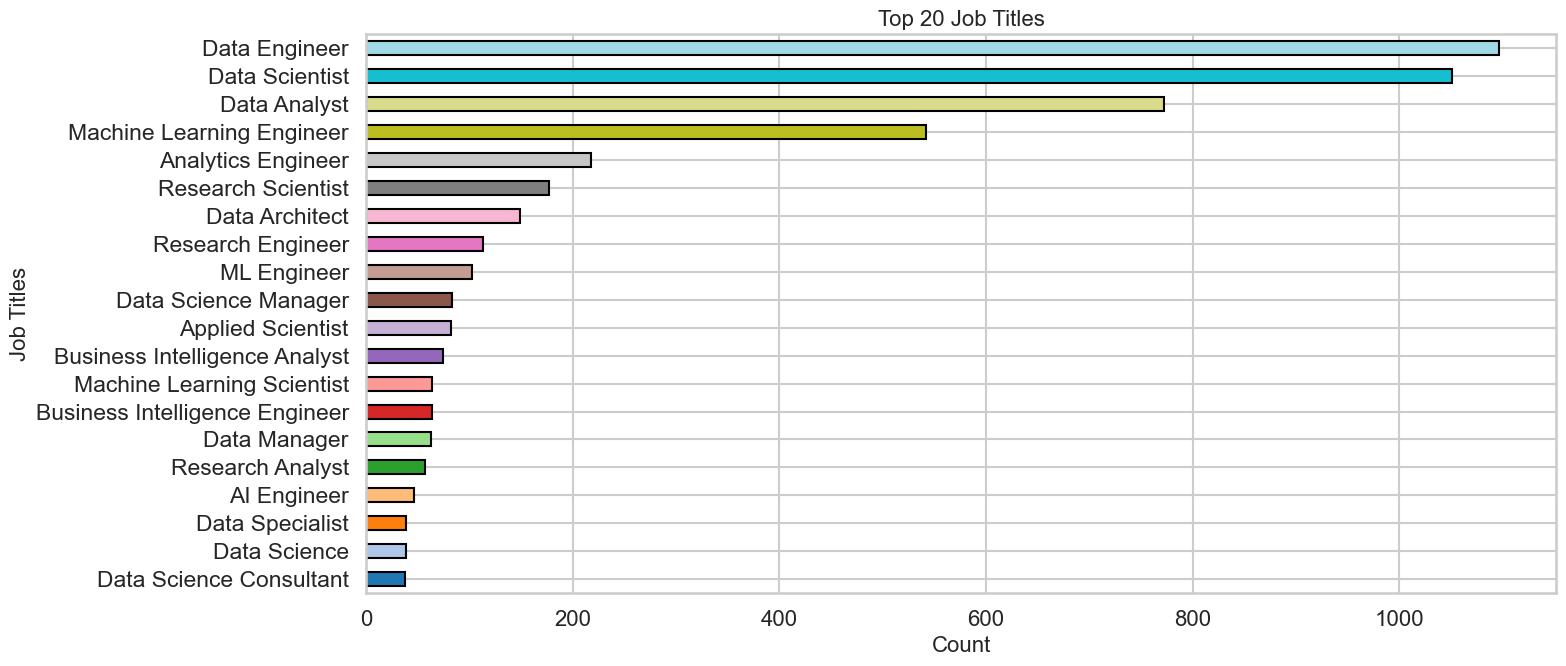

In [71]:
# count top 20 job titles and store in variable
ds_job_title_count = data_science_df["Job Title"].value_counts()[:20]
print(ds_job_title_count)

# plot the top 20 job titles
plt.figure(figsize = (16, 7))
ds_job_title_count.sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Job Titles', fontsize = 16)
plt.xlabel('Count', fontsize = 16)
plt.title('Top 20 Job Titles', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

### Observations:
The dataset shows that there are over 1,000 records for Data Engineer and Data Scientist roles, accounting for approximately 38% of the total entries. Data Analyst and Machine Learning Engineer follow, with roughly 800 and 600 entries, respectively, while the remaining roles have fewer than 250 occurrences.

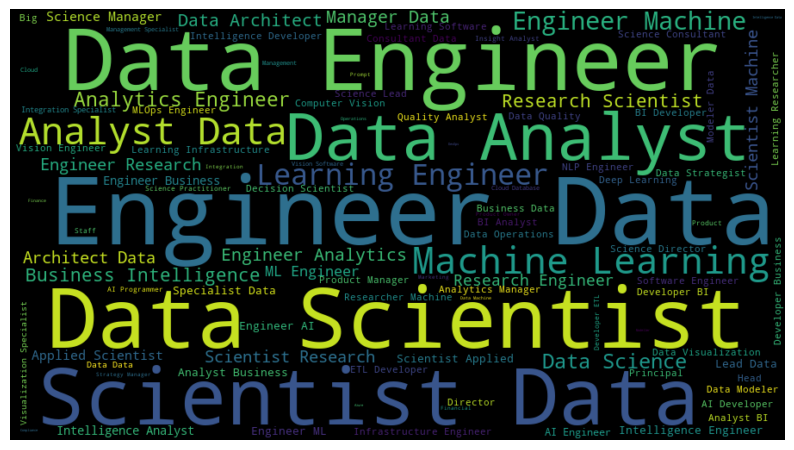

In [72]:
# combine all job titles into a single string
job_title_text = " ".join(data_science_df["Job Title"].dropna())

# create a WordCloud object
wordcloud = WordCloud(
    width=900, 
    height=500, 
    background_color='black', 
    colormap='viridis', 
    max_words=100
).generate(job_title_text)

# plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analyse Employment Type

### Count Employment Types

In [73]:
ds_employment_type_count = data_science_df["Employment Type"].value_counts()
print(ds_employment_type_count)

Employment Type
Full-Time    5690
Contract       19
Part-Time      15
Freelance      12
Name: count, dtype: int64


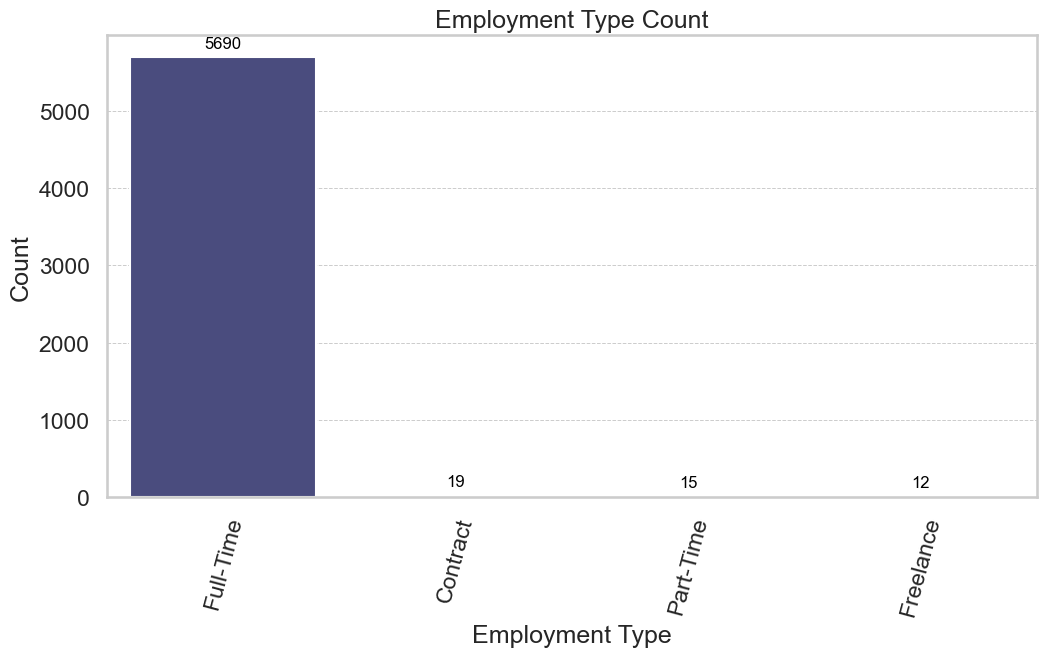

In [74]:
# plot count for employment type
count_bar_chart(ds_employment_type_count, "Employment Type", "Count", "Employment Type Count")

### Observations:
More than 99% of the data corresponds to full-time contracts, with approximately 5,700 records, creating a significant bias. This imbalance will impact the model's ability to accurately predict salaries for other employment types, such as contract (19 records), part-time (15 records), and freelance (12 records), due to insufficient data for these categories. Consequently, the model's accuracy for these employment types is likely to be adversely affected.

### Distribution of Employment Type by Company Size

<Figure size 1800x800 with 0 Axes>

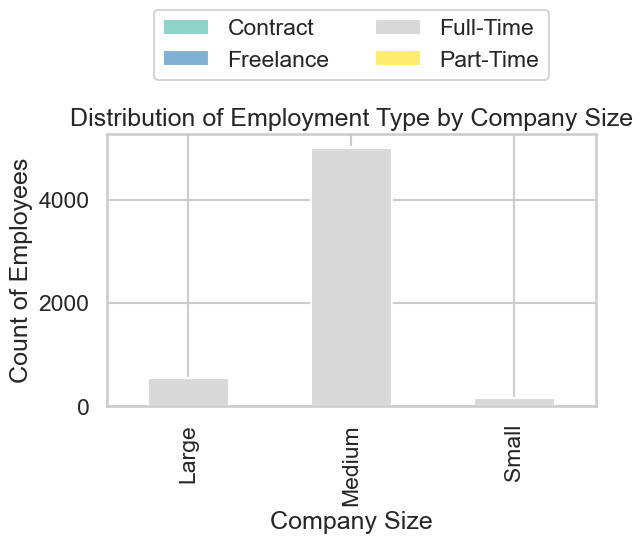

In [75]:
# count of 'Employment Type' by 'Company Size'
ds_employment_type_by_size = data_science_df.groupby(['Company Size', 'Employment Type']).size().unstack()

# plotting the count of Employment Type by Company Size
plt.figure(figsize=(18, 8))
ds_employment_type_by_size.plot(kind='bar', stacked=True, colormap='Set3')
plt.xlabel('Company Size')
plt.ylabel('Count of Employees')
plt.title('Distribution of Employment Type by Company Size')
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)  
plt.show()

### Observation:

Across all company sizes, the majority of employees are full-time. There are a small number of part-time workers in large companies, although they represent an extremely small proportion. Similarly, freelance workers are a minority in small companies.

## Analyse Experience Level

### Count Experience Level Types

In [76]:
ds_experience_level_count = data_science_df["Experience Level"].value_counts()
print(ds_experience_level_count)

Experience Level
Senior       3530
Mid          1455
Entry         524
Executive     227
Name: count, dtype: int64


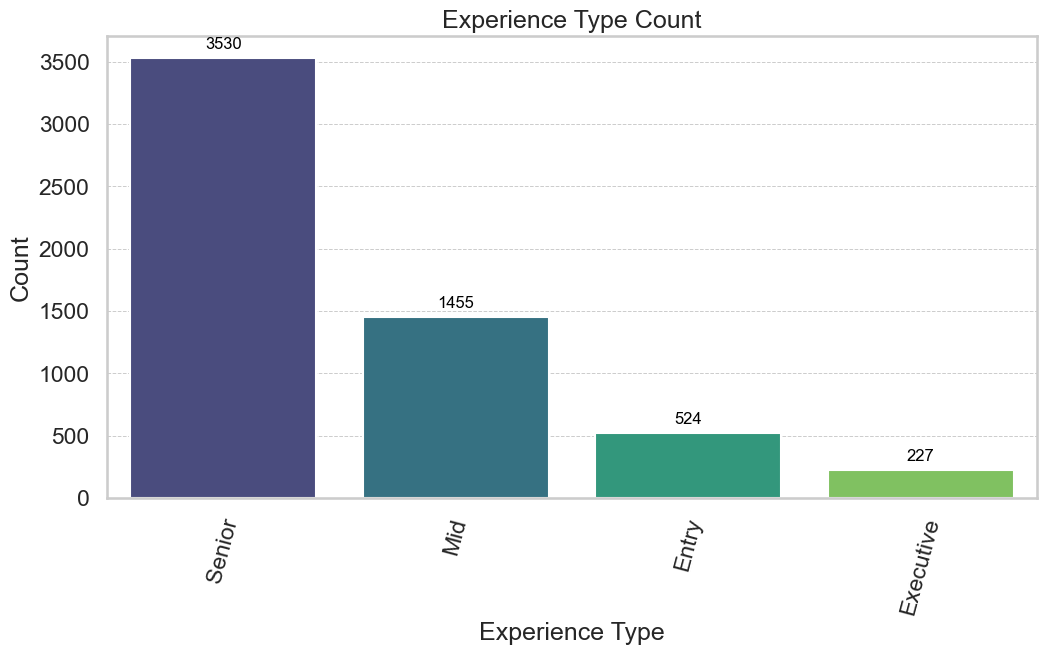

In [77]:
# plot count for experience level
count_bar_chart(ds_experience_level_count, "Experience Type", "Count", "Experience Type Count")

### Observations:

- **Senior:** The dataset includes 3,530 records of senior-level professionals, making up about 62% of the total. These individuals typically possess significant experience and expertise in their fields. 

- **Mid:** A total of 1,455 records (25% of the dataset) represent mid-level professionals, likely individuals with moderate experience who have advanced beyond entry-level roles.

- **Entry:** There are 524 records (just under 10%) for entry-level professionals, reflecting individuals in the early stages of their careers, building foundational skills and experience.

- **Executive:** The dataset features 227 records, or just under 4%, for executives, likely representing individuals in senior leadership or high-ranking roles within their organizations.

This imbalance introduces a bias toward senior-level data in the models, as they will have significantly more training data for this experience level, potentially reducing the accuracy for other categories.

### Distribution of Experience Level by Company Size

<Figure size 1800x800 with 0 Axes>

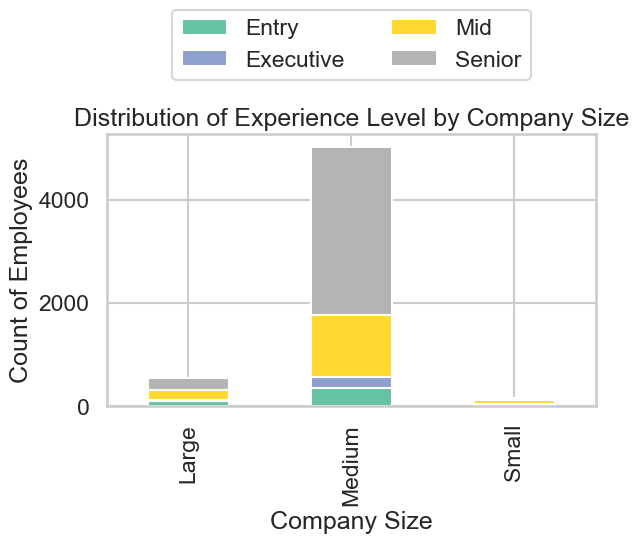

In [78]:
# count of 'Experience Level' by 'Company Size'
ds_employment_type_by_size = data_science_df.groupby(['Company Size', 'Experience Level']).size().unstack()

# plotting the count of Experience Level by Company Size
plt.figure(figsize=(18, 8))
ds_employment_type_by_size.plot(kind='bar', stacked=True, colormap='Set2')
plt.xlabel('Company Size')
plt.ylabel('Count of Employees')
plt.title('Distribution of Experience Level by Company Size')
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)  
plt.show()

### Observations:

It is evident that medium-sized companies tend to hire a higher proportion of senior-level employees compared to large and small companies.

In total, medium-sized companies employ more people than both large and small companies combined, with the number of mid-level employees surpassing that of large and small companies. This is likely because medium-sized companies make up nearly 90% of the records in this dataset.

### Average Number of Employees by Experience Level for Each Company Size

<Figure size 1200x800 with 0 Axes>

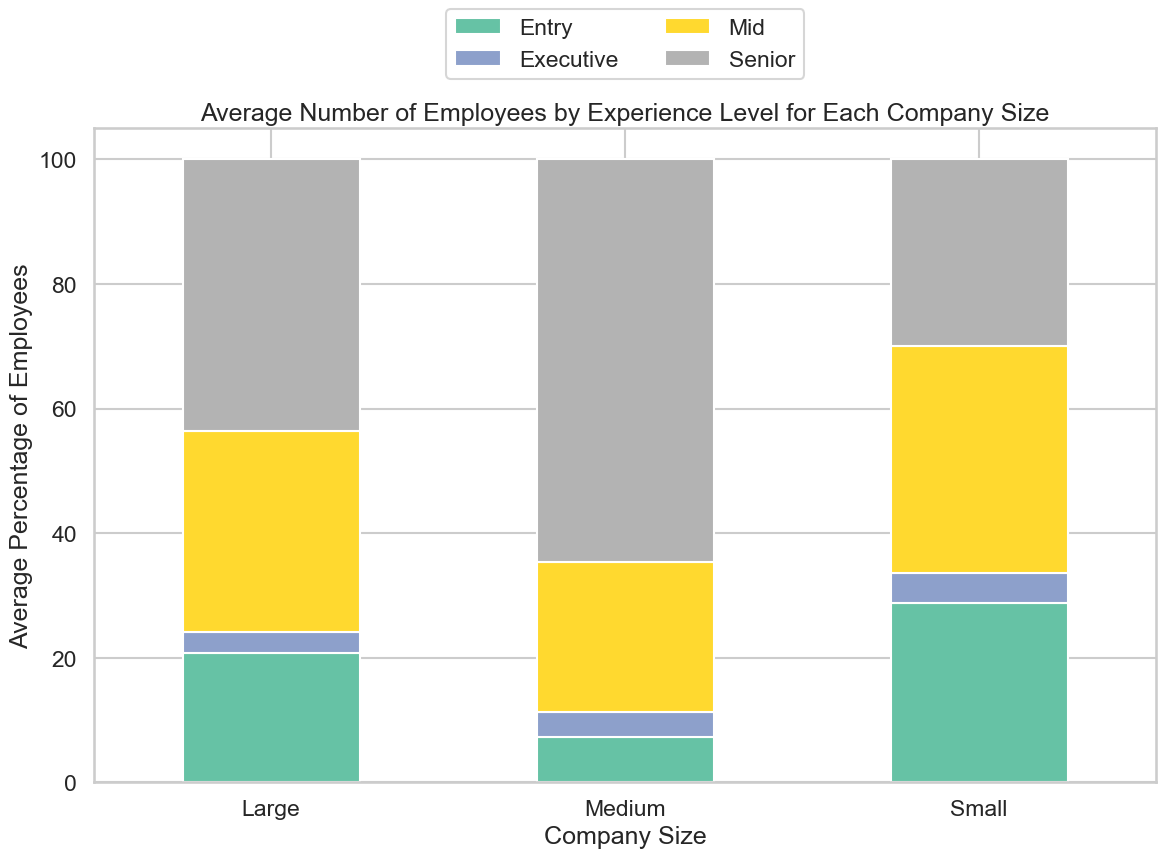

In [79]:
# group by 'Company Size' and 'Experience Level' and counting the employees
ds_employment_by_size = data_science_df.groupby(['Company Size', 'Experience Level']).size().unstack()

# normalize by dividing by the total count for each 'Company Size' to get the average per experience level
avg_employees_by_experience = ds_employment_by_size.divide(ds_employment_by_size.sum(axis=1), axis=0) * 100  # percentage

# plot the average number of employees by experience level for each company size
plt.figure(figsize=(12, 8))
avg_employees_by_experience.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 8))
plt.xlabel('Company Size')
plt.ylabel('Average Percentage of Employees')
plt.title('Average Number of Employees by Experience Level for Each Company Size')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)  
plt.show()


### Observations:

- Small companies tend to hire more entry-level employees compared to medium and large companies, with medium-sized companies hiring the fewest entry-level employees (less than 10%).
  
- Medium-sized companies employ the highest percentage of mid-level employees, with over 60% of their workforce at this experience level. In contrast, small companies hire fewer mid-level employees, likely due to financial or resource limitations.

- Across all company sizes (small, medium, and large), the percentage of executive-level employees is relatively small, averaging around 5-6%.

## Analyse Expertise Level

### Count Expertise Level Types

In [80]:
ds_expertise_level_count = data_science_df["Expertise Level"].value_counts()
print(ds_expertise_level_count)

Expertise Level
Expert          3530
Intermediate    1455
Junior           524
Director         227
Name: count, dtype: int64


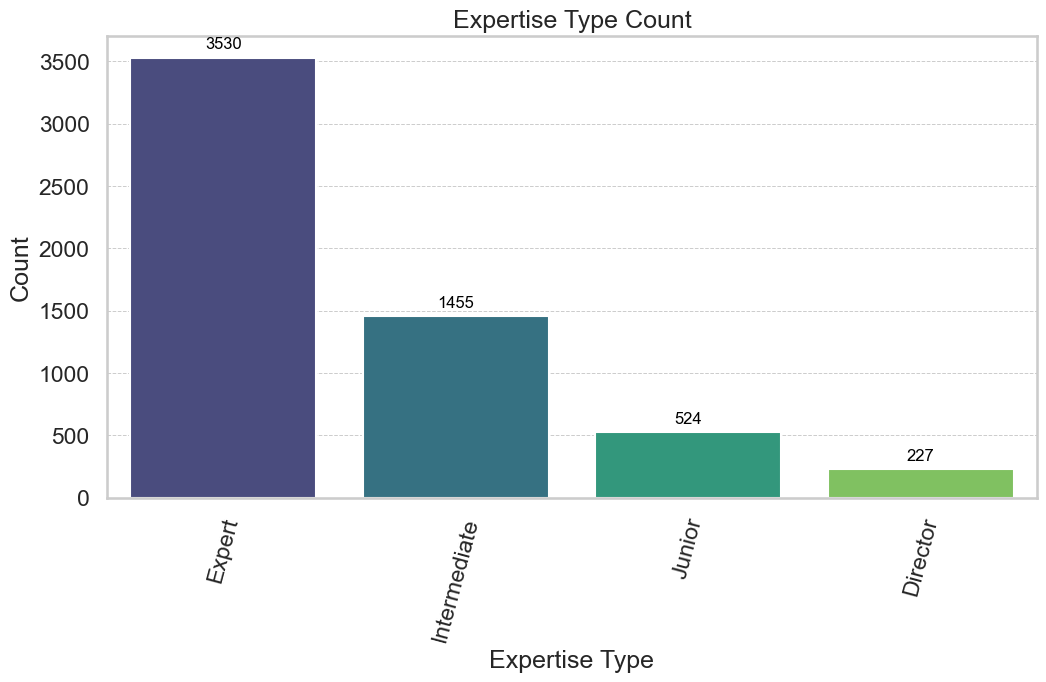

In [81]:
# plot count for expertise level
count_bar_chart(ds_expertise_level_count, "Expertise Type", "Count", "Expertise Type Count")

### Compare Employment and Expertise Level

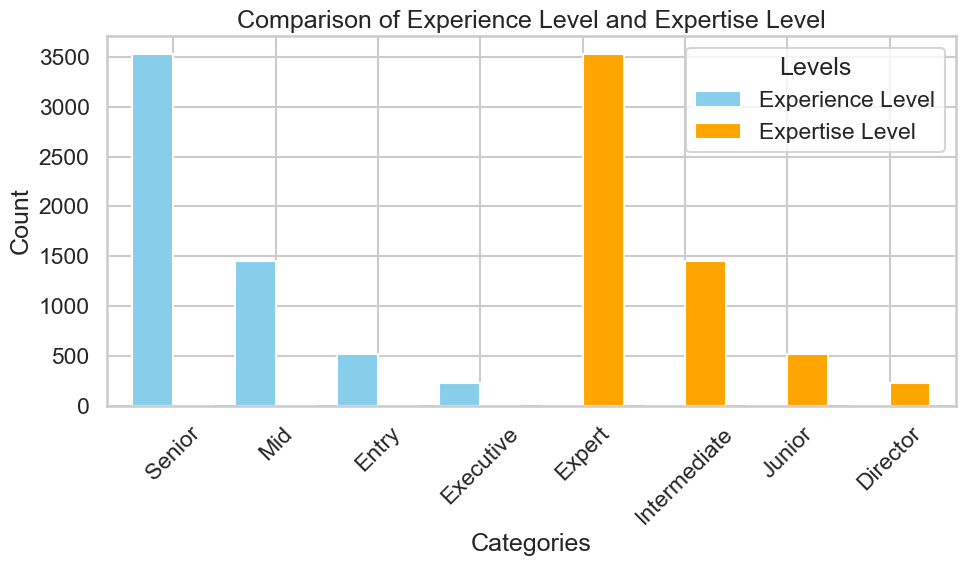

In [82]:
# double bar plot for comparing experience and expertise level
double_bar_plot(
    data=data_science_df, 
    col1="Experience Level", 
    col2="Expertise Level", 
    title="Comparison of Experience Level and Expertise Level", 
    col1_label="Experience Level", 
    col2_label="Expertise Level"
)

In [83]:
data_science_df = data_science_df.drop(columns=['Expertise Level'])

Dropped **Expertise Level** column from data_science_df.

### Observations:
It appears that both the Experience Level and Expertise Level columns are redundant in this dataset, as the values in both columns align with each other (e.g., **Senior** is mapped to **Expert**, **Mid** to **Intermediate**, etc.). Dropping the Expertise Level column will clean up the data without losing any meaningful information, and will make the model simpler to work with.

## Company Size Analysis

### Count Company Sizes

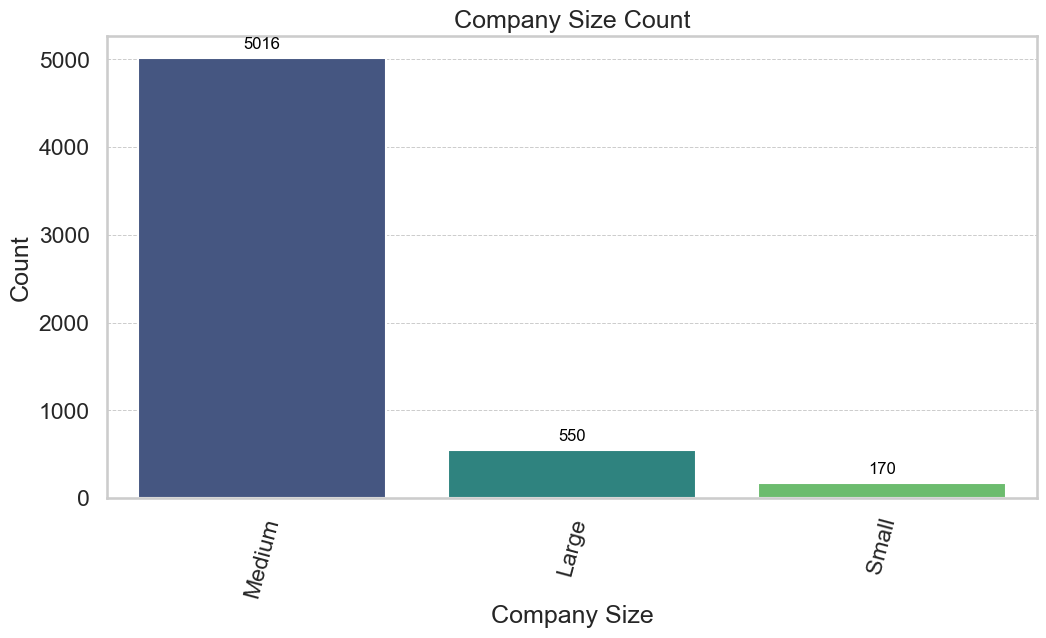

In [84]:
ds_company_size = data_science_df['Company Size'].value_counts()
count_bar_chart(ds_company_size, "Company Size", "Count", "Company Size Count")

### Observation:

Most of the companies are medium sized which represents around 87% of all recoreds, while large companies are under 10% followed by 170 small companies.

### Distribution of Company Size by Country (Top 10 Locations)

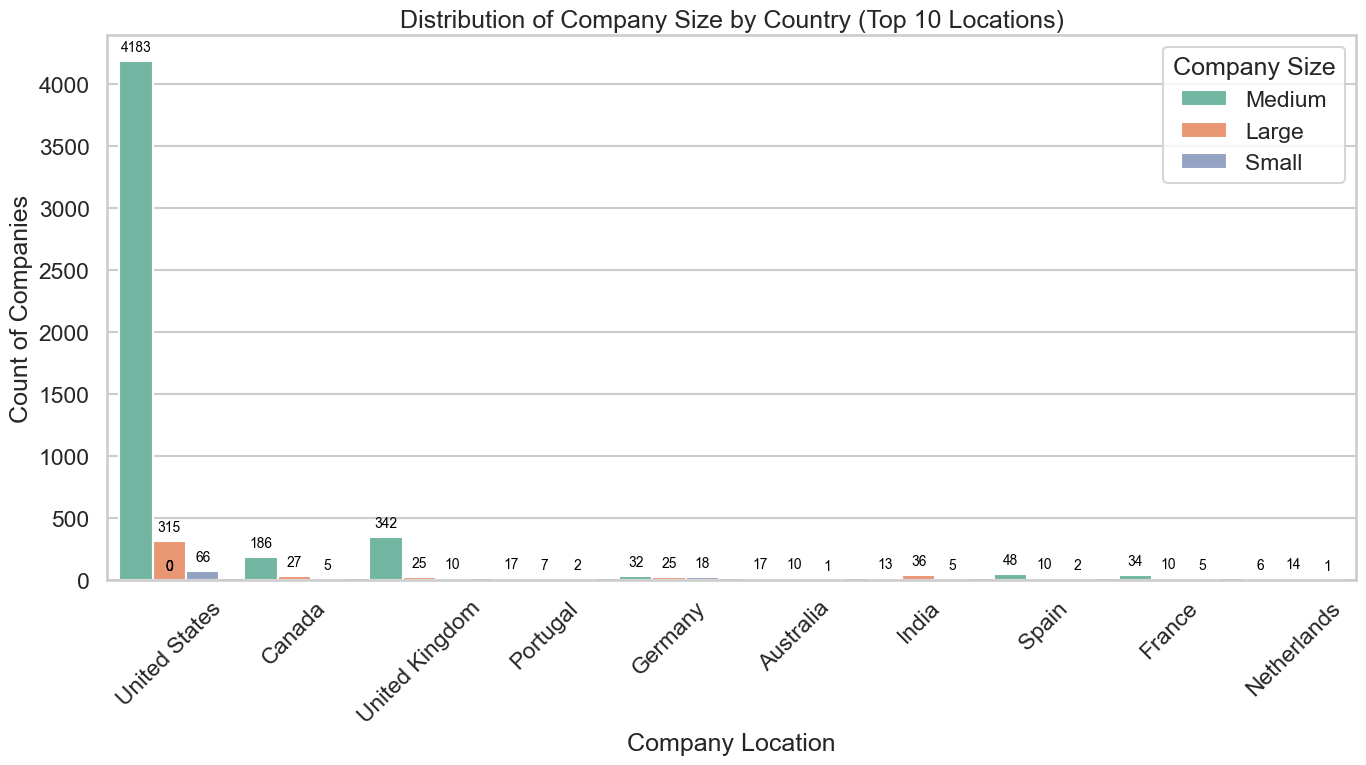

In [85]:
# top 10 most frequent company locations
top_10_most_freq_countries = data_science_df["Company Location"].value_counts().sort_values(ascending=False).head(10).index

# filter the data to include only the top 10 most frequent locations
top_10_country_location_and_company_size = data_science_df[data_science_df["Company Location"].isin(top_10_most_freq_countries)]

# plot 'Company Location' vs 'Company Size'
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Company Location', hue='Company Size', data=top_10_country_location_and_company_size, palette='Set2')
plt.xlabel('Company Location')
plt.ylabel('Count of Companies')
plt.title('Distribution of Company Size by Country (Top 10 Locations)')
plt.xticks(rotation=45)

# add annotations
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    x = p.get_x() + p.get_width() / 2
    
    # add annotation to each bar
    ax.annotate(f'{int(height)}', 
                xy=(x, height), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', 
                va='bottom', 
                fontsize=10, 
                color='black')

plt.tight_layout()
plt.show()

### Observation:

The majority of medium and large-scale companies are located in the US, with over 4,183 medium-sized and 315 large companies. The UK follows, with a notable number of medium-sized companies (342), surpassing the count of large companies in the US (315). Additionally, the US stands out as the country with the highest number of small companies compared to other nations.

## Company Location and Employee Residence Analyis

### Comparison of Company Location vs Employee Residence (Top 20)

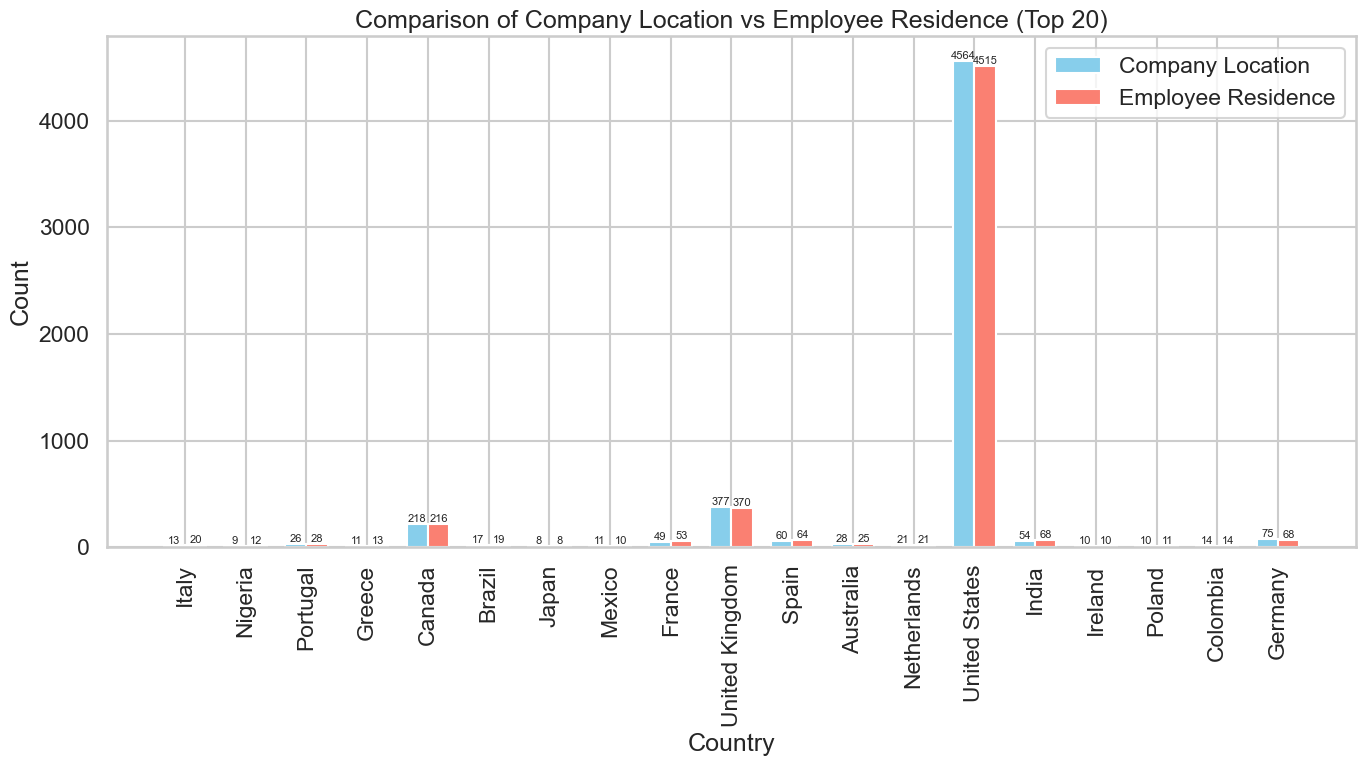

In [86]:
# top 20 counts for 'Company Location' and 'Employee Residence'
ds_company_location = data_science_df['Company Location'].value_counts().head(20)
ds_employee_residence = data_science_df['Employee Residence'].value_counts().head(20)

# align both dataframes to the same index (top 20 countries)
common_locations = list(set(ds_company_location.index).intersection(ds_employee_residence.index))
ds_company_location = ds_company_location[common_locations]
ds_employee_residence = ds_employee_residence[common_locations]

# create figure and axes
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(ds_company_location))

# plot data
bars1 = ax.bar(index, ds_company_location, bar_width, label='Company Location', color='skyblue')
bars2 = ax.bar(index + bar_width, ds_employee_residence, bar_width, label='Employee Residence', color='salmon')

# add annotations for Company Location bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=8)

# add annotations for Employee Residence bars
for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Comparison of Company Location vs Employee Residence (Top 20)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(ds_company_location.index, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

### Observations:

- The majority of companies are located in the **United States**, although there are cases where employees of US-based companies do not reside in the US, possibly due to remote work arrangements.

- Countries like **India**, **Nigeria**, and **Italy** show that some residents work for companies located outside their home country.

- In contrast, the **United Kingdom**, **Ireland** and **Canada** exhibit a near 1:1 ratio between company location and employee residence, suggesting that employees in these countries predominantly work for local companies.

## Year Analysis

### Number of Job Records By Year

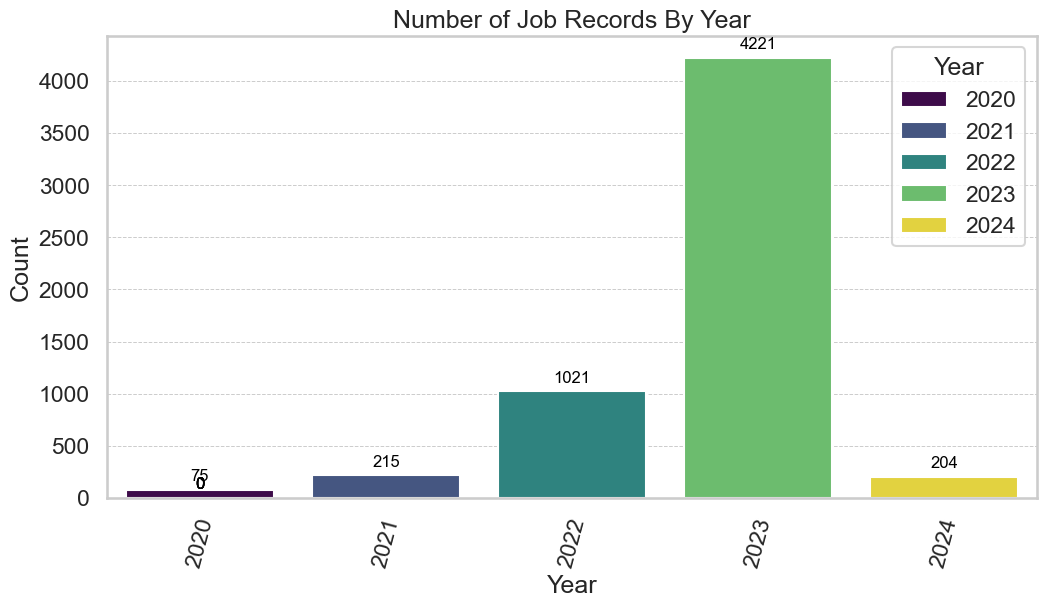

In [87]:
ds_year = data_science_df['Year'].value_counts()
count_bar_chart(ds_year, "Year", "Count", "Number of Job Records By Year")

### Observations:

Approximately 74% of all records are from the year 2023, with the smallest number of records coming from 2020, totaling only 75 jobs. The years 2021 and 2024 represent similar amounts of data, with 215 and 204 records respectively.

## Salary Analysis

### Investigating Salary Columns

In [88]:
data_science_df.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Salary',
       'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [89]:
ds_salary_currency = data_science_df['Salary Currency'].value_counts()
ds_salary_currency

Salary Currency
United States Dollar      5001
British Pound Sterling     301
Euro                       288
Indian Rupee                51
Canadian Dollar             39
Australian Dollar           11
Polish Zloty                 7
Singapore Dollar             6
Swiss Franc                  5
Brazilian Real               4
Japanese Yen                 4
Danish Krone                 3
Turkish Lira                 3
Hungarian Forint             3
Thai Baht                    2
Norwegian Krone              2
Israeli New Shekel           1
Hong Kong Dollar             1
South African Rand           1
Philippine Peso              1
Mexican Peso                 1
Chilean Peso                 1
Name: count, dtype: int64

### Observations:

There is a column called "Salary," which represents salaries in various currencies and is dependent on the "Salary Currency" column. To simplify the analysis, it's better to use the "Salary in USD" column, as it already converts non-USD salaries to USD, eliminating the need for currency conversion. This makes comparisons easier. Therefore, we will drop the "Salary" and "Salary Currency" columns and rename "Salary in USD" to just "Salary."

In [90]:
# drop the 'Salary' and 'Salary Currency' columns
data_science_df = data_science_df.drop(columns=['Salary', 'Salary Currency'])

# rename the 'Salary in USD' column to 'Salary'
data_science_df = data_science_df.rename(columns={'Salary in USD': 'Salary'})

### Mean Salary (USD) By Experience Level

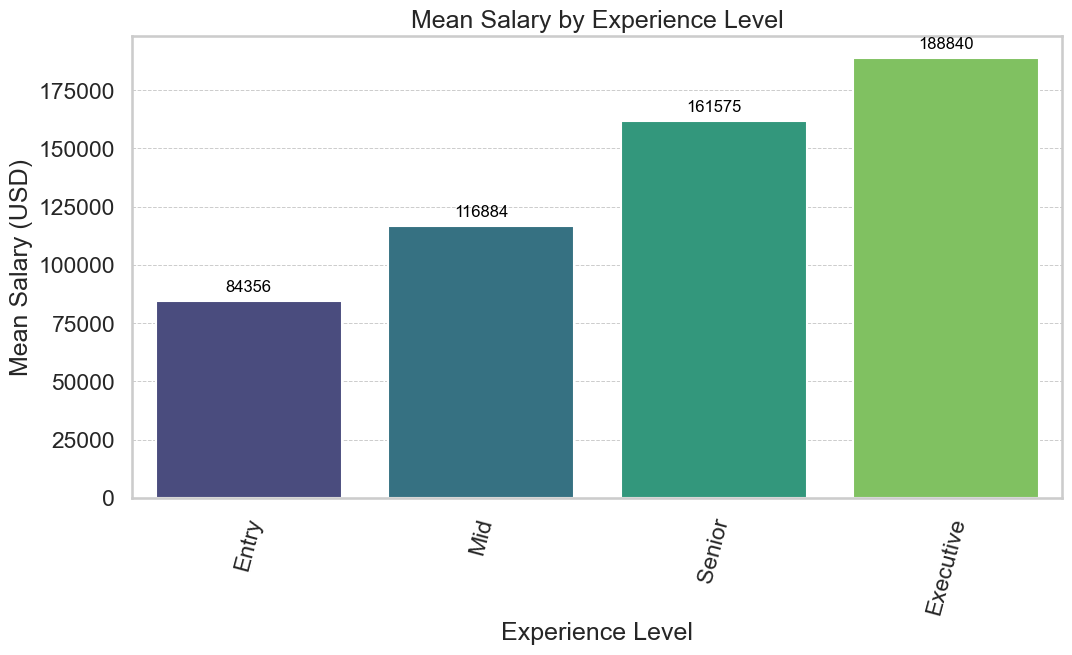

In [91]:
# calculate mean salary grouped by 'Experience Level'
ds_mean_salary_by_experience = data_science_df.groupby('Experience Level')['Salary'].mean().round(2).sort_values(ascending= True)
count_bar_chart(ds_mean_salary_by_experience, "Experience Level", "Mean Salary (USD)", "Mean Salary by Experience Level")

### Observations:

- Entry-level employees earn the least, with an average salary of approximately $84k.

- Mid-level employees earn about 40% more than entry-level employees, reflecting a significant jump in compensation.

- Senior-level employees see another 40% salary increase over mid-level, earning more than $160k on average.

- Executive-level employees earn the highest, just under $190k, which is a 17% increase compared to senior-level salaries—a substantial gain despite the smaller percentage increase.

### Histogram and Box & Whisker Plots of Salary (USD) and Year

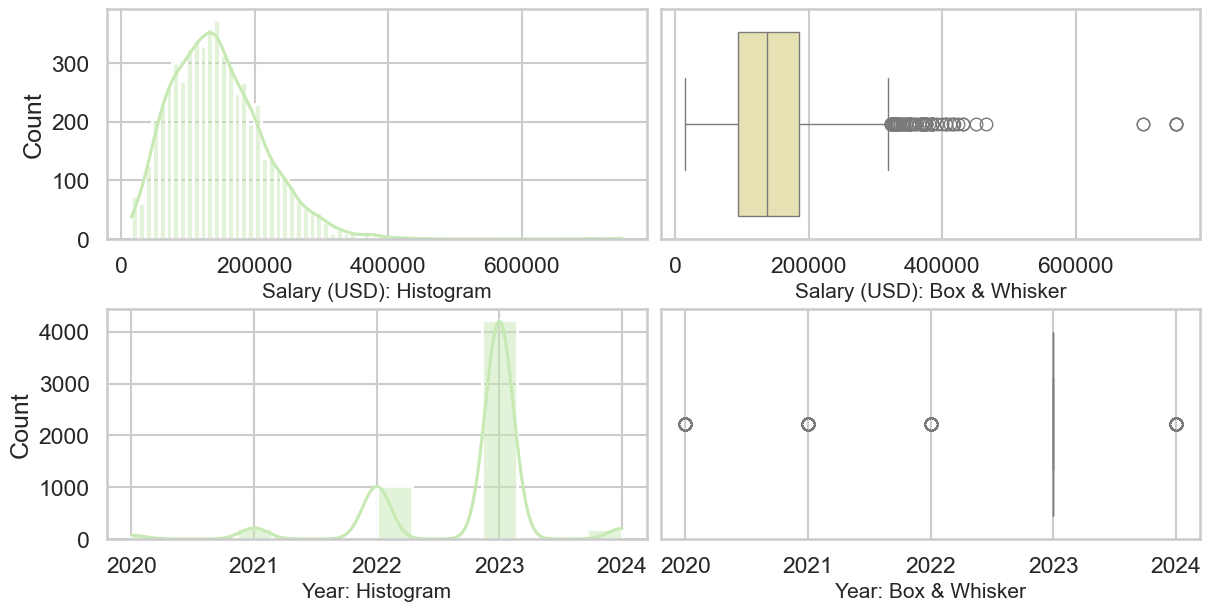

In [92]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('pastel')

fig, axs = plt.subplots(2, 2, figsize=(12, 6), constrained_layout=True)

# Salary of the Individual: Histogram
sns.histplot(data_science_df.Salary, color='#c7e9b4', kde=True, linewidth=2, ax=axs[0, 0])
axs[0, 0].set_xlabel('Salary (USD): Histogram', fontsize=15)

# Salary of the Individual: Box & Whisker Plot
sns.boxplot(data_science_df.Salary, color='#EEE8AA', orient='h', ax=axs[0, 1])
axs[0, 1].set_xlabel('Salary (USD): Box & Whisker', fontsize=15)

# Year: Histogram
sns.histplot(data_science_df.Year, color='#c7e9b4', kde=True, linewidth=2, ax=axs[1, 0])
axs[1, 0].set_xlabel('Year: Histogram', fontsize=15)

# Year: Box & Whisker Plot
sns.boxplot(data_science_df.Year, color='#EEE8AA', orient='h', ax=axs[1, 1])
axs[1, 1].set_xlabel('Year: Box & Whisker', fontsize=15)

# setting title and font size for remaining subplots
for i in range(2, 2):
    axs[i, 0].set_title('', fontsize=15)
    axs[i, 1].set_title('', fontsize=15)

plt.show()

In [93]:
high_salary_individuals = data_science_df[data_science_df['Salary'] > 450000]
# filter data for individuals with salary greater than 450k
high_salary_individuals.head(10)

Job Title Employment Type Experience Level  \
507   Machine Learning Scientist       Full-Time              Mid   
511    Machine Learning Engineer       Full-Time              Mid   
769           Analytics Engineer       Full-Time           Senior   
1038               Data Engineer       Full-Time        Executive   
1218          Analytics Engineer       Full-Time              Mid   
1248               Data Engineer       Full-Time              Mid   
1316              Data Scientist       Full-Time           Senior   

     Company Location  Salary Employee Residence Company Size  Year  
507     United States  750000      United States       Medium  2023  
511     United States  750000      United States       Medium  2023  
769     United States  700000      United States       Medium  2023  
1038    United States  465000      United States       Medium  2023  
1218    United States  700000      United States       Medium  2023  
1248    United States  750000      United States       Medium  2023  
1316    United States  750000      United States       Medium  2023

### Observations:

The Box and Whisker plot for salaries reveals that there are five individuals earning over $450,000. Interestingly, four out of these seven are mid-level employees, all earning more than $750,000. Despite the average salary for this level being around $117,000. This discrepancy, where mid-level employees are earning more than six times the average, suggesting potential data entry errors. Therefore, these records will be removed from the dataset to ensure accuracy.

### Removing Salary Outliers

In [94]:
# remove rows where 'Experience Level' is 'Mid' and 'Salary' is greater than $700,000
data_science_df = data_science_df[~((data_science_df['Experience Level'] == 'Mid') & (data_science_df['Salary'] >= 700000))]

high_salary_individuals = data_science_df[data_science_df['Salary'] > 450000]
high_salary_individuals.head(10)

Job Title Employment Type Experience Level Company Location  \
769   Analytics Engineer       Full-Time           Senior    United States   
1038       Data Engineer       Full-Time        Executive    United States   
1316      Data Scientist       Full-Time           Senior    United States   

      Salary Employee Residence Company Size  Year  
769   700000      United States       Medium  2023  
1038  465000      United States       Medium  2023  
1316  750000      United States       Medium  2023

Removed Mid-level experienced individuals with salaries more than $700,000

### Box and Whisker of Salary by Experience Level

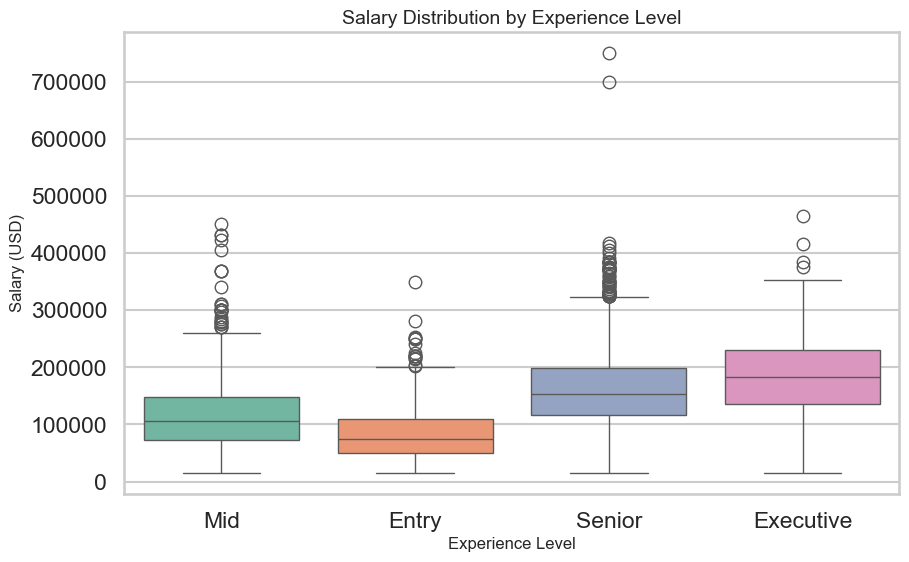

In [95]:
# box and whisker of salary by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_science_df, x='Experience Level', y='Salary', hue = 'Experience Level', palette='Set2')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.title('Salary Distribution by Experience Level', fontsize=14)
plt.show()

### Box and Whisker of Salary by Employment Type

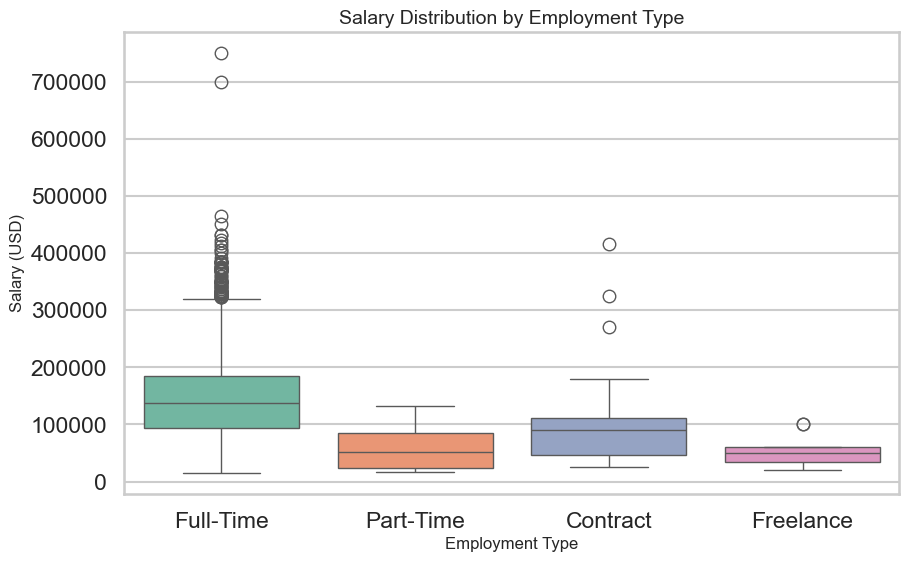

In [96]:
# box and whisker of salary by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_science_df, x='Employment Type', y='Salary', hue = 'Employment Type', palette='Set2')
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.title('Salary Distribution by Employment Type', fontsize=14)
plt.show()

### Mean Data Science Salary Per Country

In [97]:
# group by 'Company Location' and calculating mean, renaming the column
average_salary_per_country = data_science_df.groupby('Company Location')['Salary'].mean().rename("Mean Salary")
average_salary_per_country = average_salary_per_country.round(2) # round mean to 2 decimal places

# renaming names to match geopandas country names
name_mapping = {
    "United States": "United States of America",
    "Russian Federation": "Russia",
    "Vietnam": "Viet Nam",
    "Korea, Republic of": "South Korea",
    "Moldova, Republic of": "Moldova",
    "Iran, Islamic Republic of": "Iran",
    "Bahamas": "The Bahamas"
}
average_salary_per_country = average_salary_per_country.rename(index=name_mapping)

# loading world map shapefile data using GeoPandas
world = gpd.read_file(r'.\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp')

# merging the average salary data with the world map data
world = world.set_index('SOVEREIGNT').join(average_salary_per_country)

# convert the GeoDataFrame to GeoJSON
world_json = world.to_json()

# create a Folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# add a choropleth layer for 'Mean Salary'
folium.Choropleth(
    geo_data=world_json,
    name='choropleth',
    data=average_salary_per_country,
    columns=[average_salary_per_country.index, 'Mean Salary'],
    key_on='feature.id',  # matches the GeoJSON properties to the mean data
    fill_color='RdYlGn',
    fill_opacity=1,
    line_opacity=0.4,
    legend_name='Average Data Science Salary Per Country (USD)',
).add_to(m)

# add tooltips with country names and salary info
folium.GeoJson(
    world_json,
    style_function=lambda x: {
        'fillColor': 'transparent',  # keep the fill color managed by Choropleth
        'color': 'black',            # border color
        'weight': 0.4,               # border thickness
        'fillOpacity': 0
    },
    highlight_function=lambda x: {
        'weight': 2,                 # thicker border on hover
        'color': 'blue',             # border color on hover
        'fillOpacity': 0.5           # add a slight fill opacity on hover
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['GEOUNIT', 'Mean Salary'], 
        aliases=['Country:', 'Mean Salary (USD):']),
).add_to(m)

# display the interactive map
from IPython.display import display
display(m)

### Top 20 Countries with Highest Average Data Science Salaries

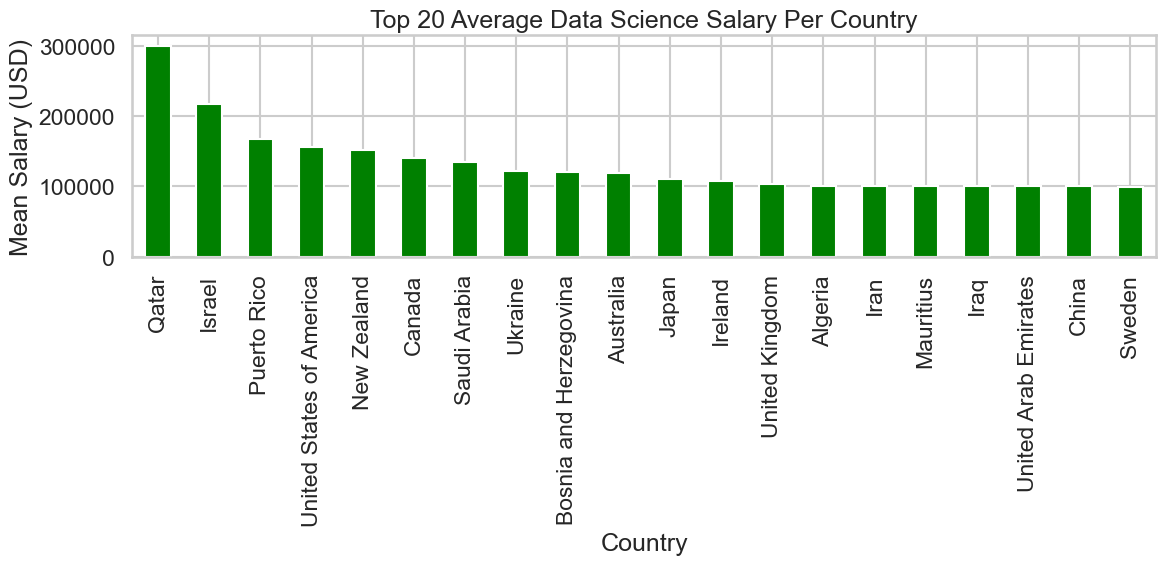

In [98]:
# plot bar chart for top 20 countries with highest data science average salaries
plt.figure(figsize=(12, 6))
average_salary_per_country.sort_values(ascending=False).head(20).plot(kind='bar', color='green')

plt.xlabel('Country')
plt.ylabel('Mean Salary (USD)')
plt.title('Top 20 Average Data Science Salary Per Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Top 20 Countries with Lowest Average Data Science Salaries

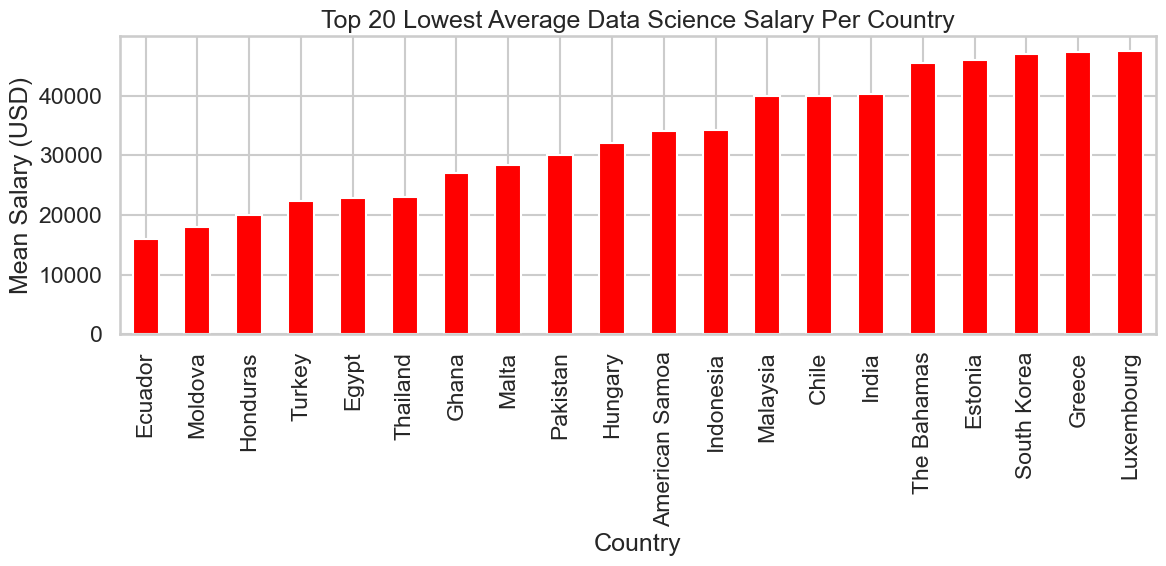

In [99]:
# plot bar chart for top 20 countries with lowest data science average salaries
plt.figure(figsize=(12, 6))
average_salary_per_country.sort_values(ascending=True).head(20).plot(kind='bar', color='red')

plt.xlabel('Country')
plt.ylabel('Mean Salary (USD)')
plt.title('Top 20 Lowest Average Data Science Salary Per Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Observations:

It is evident that Qatar stands out with the highest average data science salary of $300,000, followed by Israel at approximately $210,000, which is significantly lower. The US and Puerto Rico come next with average salaries around $160,000.

On the other hand, the lowest average salaries are observed in Ecuador at around $16,000, Moldova at roughly $18,000, and Honduras at just under $20,000.

However, it's important to note that the majority of the data comes from companies based in the US (around 85%), as we have previously analyzed the company location and employee residence. This skews the results, as countries with fewer salary records, such as Iraq, China, or Moldova, which have only a single entry, may not provide an accurate reflection of the overall salary trends. Therefore, the mean salary values should not be relied on, as they may not fully represent the salary data for these countries.

### Average Salary Per Job Title

In [100]:
ds_job_title_count

Job Title
Data Engineer                     1097
Data Scientist                    1051
Data Analyst                       772
Machine Learning Engineer          542
Analytics Engineer                 218
Research Scientist                 177
Data Architect                     149
Research Engineer                  113
ML Engineer                        102
Data Science Manager                83
Applied Scientist                   82
Business Intelligence Analyst       74
Machine Learning Scientist          64
Business Intelligence Engineer      64
Data Manager                        63
Research Analyst                    57
AI Engineer                         46
Data Science                        39
Data Specialist                     39
Data Science Consultant             38
Name: count, dtype: int64

Among the top 20 most common job titles, approximately 2/5 of all records are attributed to **Data Engineer** and **Data Scientist** roles.

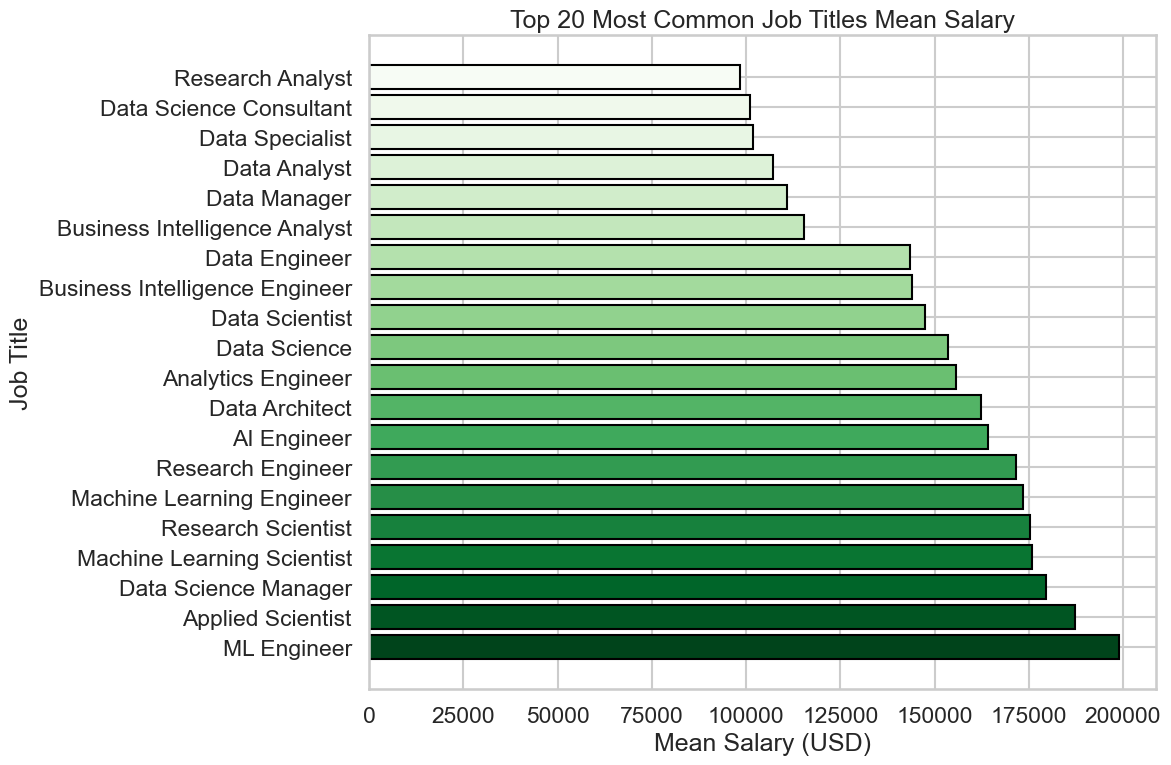

In [101]:
# top 20 most common job titles
top_20_ds_job_title = ds_job_title_count.head(20).index

# filter the dataset to include only these top 20 job titles
top_20_job_titles_df = data_science_df[data_science_df['Job Title'].isin(top_20_ds_job_title)]

# group by 'Job Title' and calculate mean salary
df_average_salary_per_top_20_job_title = top_20_job_titles_df.groupby('Job Title')['Salary'].mean().round(2).reset_index()

# sort the values by mean salary in descending order
df_average_salary_per_top_20_job_title = df_average_salary_per_top_20_job_title.sort_values('Salary', ascending=False)

# create a blue gradient colormap
colors = plt.cm.Greens_r(np.linspace(0, 1, len(df_average_salary_per_top_20_job_title)))

plt.figure(figsize=(12, 8))

# create a horizontal bar chart
bars = plt.barh(df_average_salary_per_top_20_job_title['Job Title'], df_average_salary_per_top_20_job_title['Salary'], color=colors, edgecolor='black')
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 20 Most Common Job Titles Mean Salary')
plt.tight_layout()
plt.show()


### Observation:

- **ML Engineers** earn the highest average salary, around $200,000, closely followed by **Applied Scientists** with an average salary of $187,000.

- Additionally, we can consider the **Data Scientist** and **Data Engineer** roles as the most reliable due to having over 1,000 records for each. On the other hand, roles like **Data Science Consultant**, with only 38 records, may not be as reliable for drawing conclusions compared to the more widely represented roles like **Data Scientist**.

### Top 10 Job Titles Count Between 2020 to 2023

C:\Users\alisu\AppData\Local\Temp\ipykernel_8644\3649980624.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


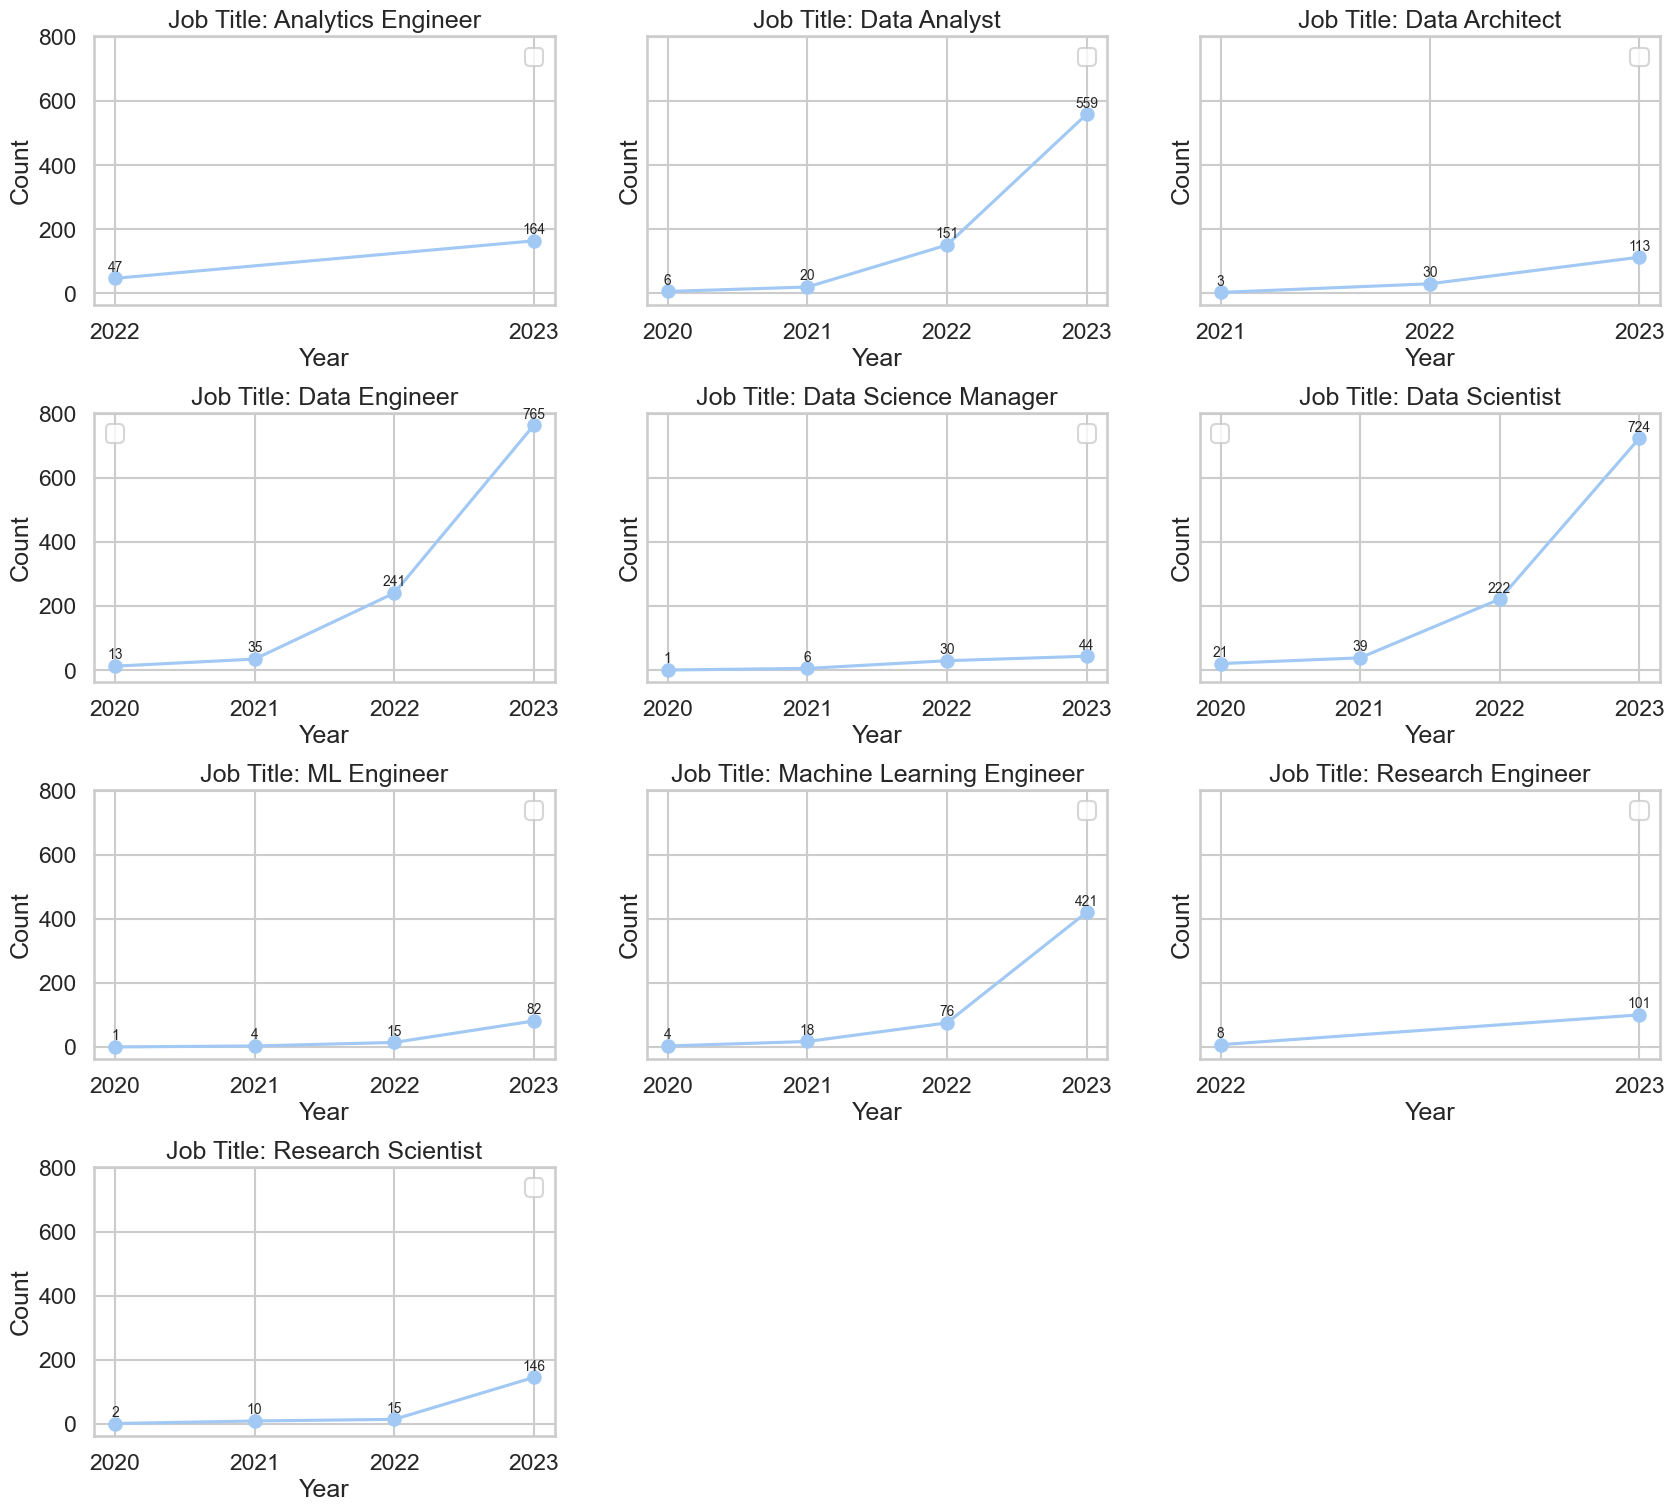

In [102]:
# filter top 10 most common job titles
top_10_job_titles = data_science_df['Job Title'].value_counts().head(10).index

# filter dataset for years 2020-2023 and the top 10 job titles
ds_top_10_job_titles_2020_2023_df = data_science_df[(data_science_df['Job Title'].isin(top_10_job_titles)) & 
                               (data_science_df['Year'].between(2020, 2023))]

# group by 'Job Title' and 'Year' to get the count
ds_top_10_job_titles_2020_2023_df = ds_top_10_job_titles_2020_2023_df.groupby(['Job Title', 'Year']).size().reset_index(name='Count')

# get job titles
ds_job_titles = ds_top_10_job_titles_2020_2023_df['Job Title'].unique()

# number of subplots to create
num_subplots = len(ds_job_titles)

# calculate the number of rows and columns for the subplots
num_cols = 3
num_rows = (num_subplots // num_cols) + (1 if num_subplots % num_cols != 0 else 0)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})
axs = axs.flatten() # flatten the axs array for easier indexing

for i in range(num_subplots):
    job_title = ds_job_titles[i]
    data = ds_top_10_job_titles_2020_2023_df[ds_top_10_job_titles_2020_2023_df['Job Title'] == job_title]

    # plot data points
    axs[i].scatter(data['Year'], data['Count'], alpha=0.7)

    # plot line connecting the data points
    axs[i].plot(data['Year'], data['Count'], marker='o', linestyle='-')

    # annotate each data point with the count
    for j, count in enumerate(data['Count']):
        axs[i].annotate(count, xy=(data['Year'].iloc[j], count), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)
    
    # set x-axis ticks as integers
    axs[i].set_xticks(data['Year'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Job Title: {job_title}')
    axs[i].legend()

# remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)
plt.show()


### Top 10 Average Salaries Per Job Title From 2020 to 2023

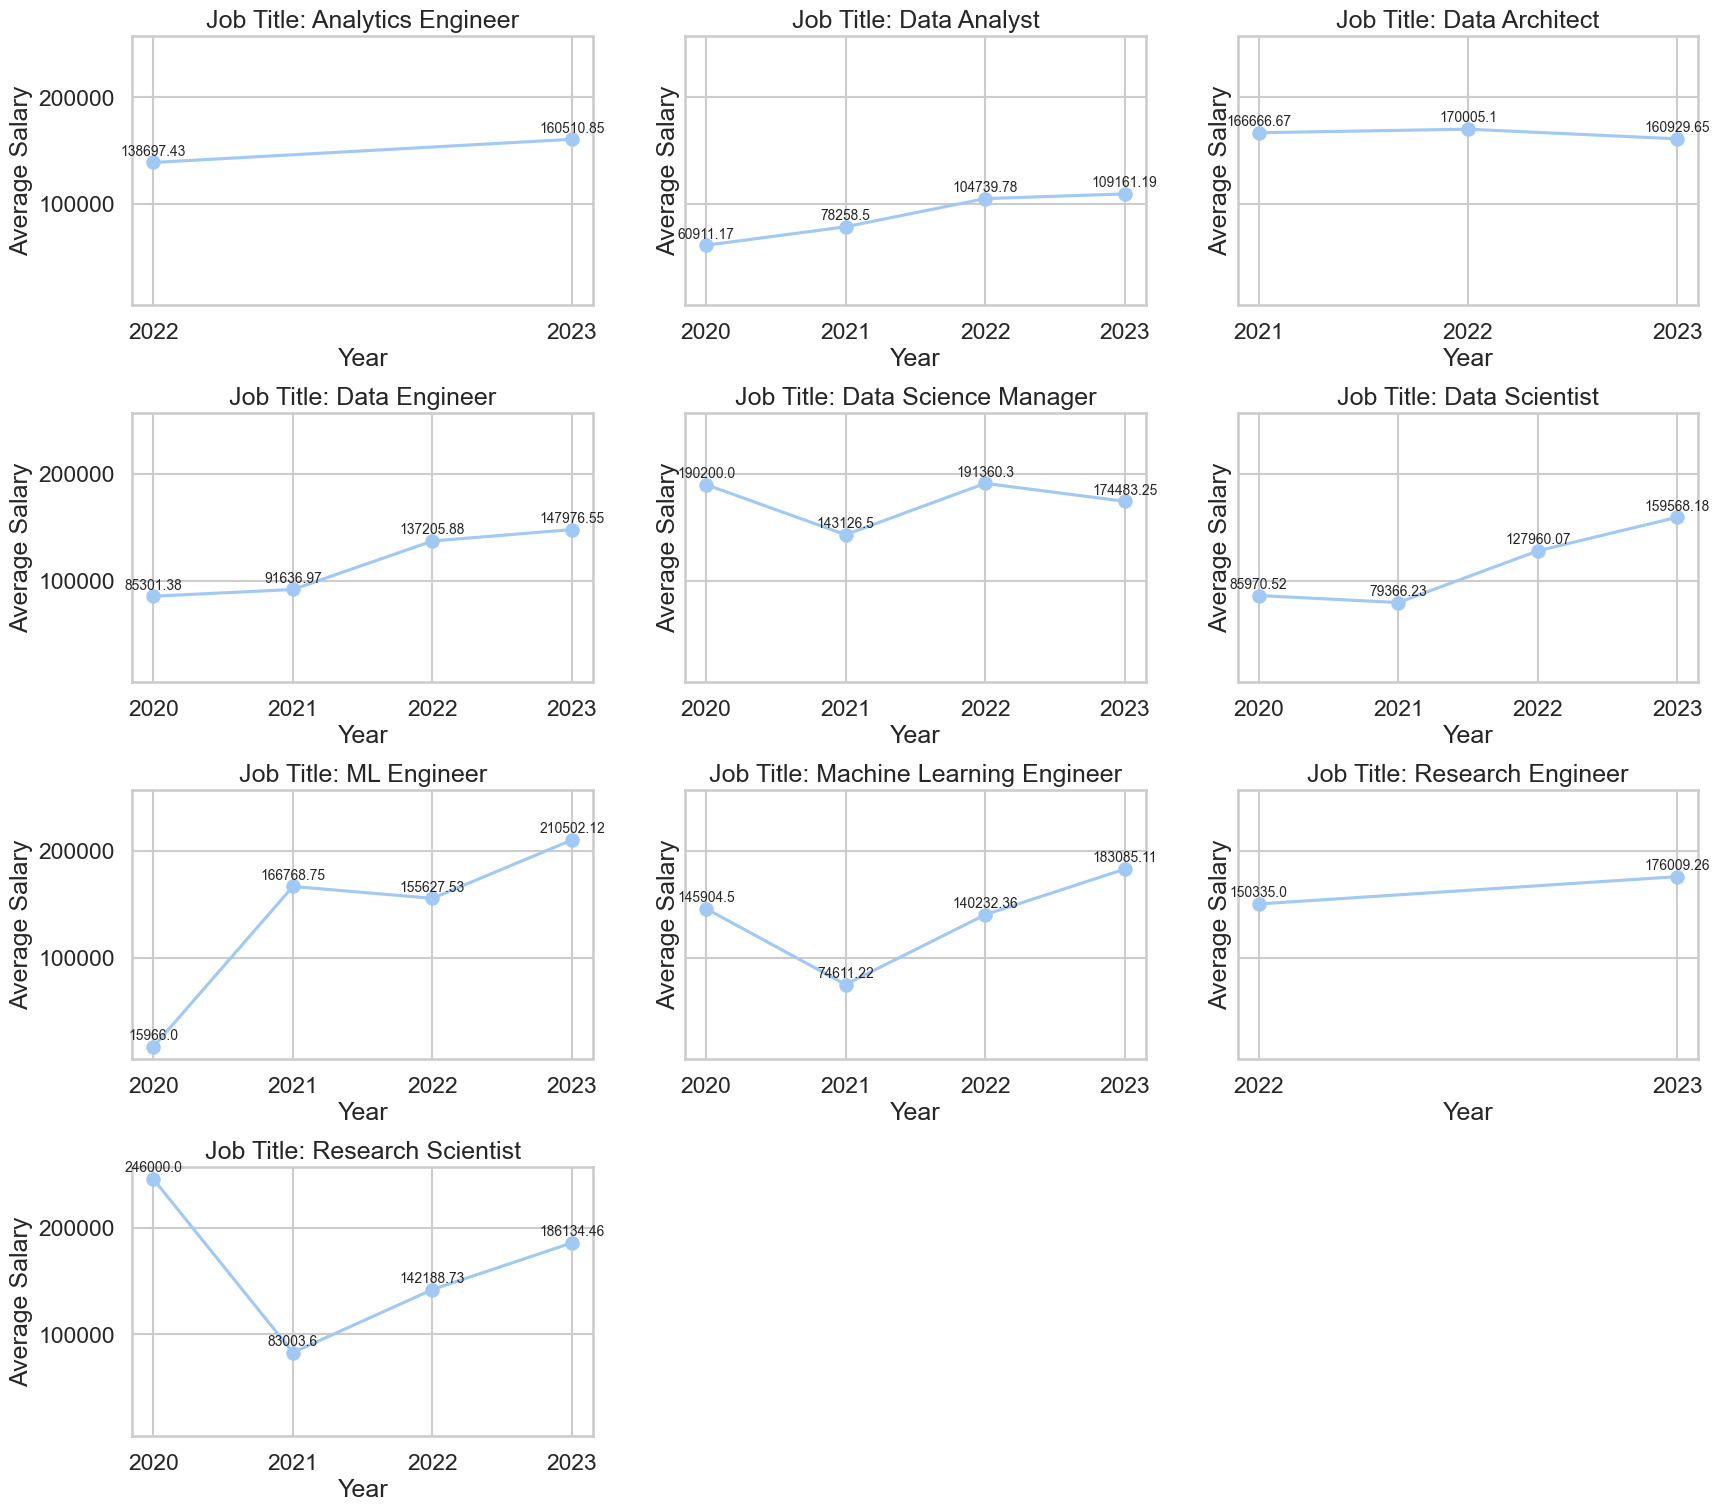

In [103]:
# filter dataset for years 2020-2023 and the top 10 job titles
ds_top_10_job_titles_2020_2023_average_salary_df = data_science_df[(data_science_df['Job Title'].isin(top_10_job_titles)) & 
                               (data_science_df['Year'].between(2020, 2023))]

ds_top_10_job_titles_2020_2023_average_salary = ds_top_10_job_titles_2020_2023_average_salary_df.groupby(['Job Title', 'Year'])['Salary'].agg(Mean_Salary='mean').round(2).reset_index().sort_values('Mean_Salary', ascending=False)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})
axs = axs.flatten()

for i in range(num_subplots):
    job_title = ds_job_titles[i] # get data for the current subplot
    data = ds_top_10_job_titles_2020_2023_average_salary[ds_top_10_job_titles_2020_2023_average_salary['Job Title'] == job_title].sort_values('Year')

    # Plot data points
    axs[i].scatter(data['Year'], data['Mean_Salary'], label=job_title, alpha=0.7)

    # Plot a line connecting the data points
    axs[i].plot(data['Year'], data['Mean_Salary'], marker='o', linestyle='-')

    # annotate each data point with the mean salary
    for j, count in enumerate(data['Mean_Salary']):
        axs[i].annotate(count, xy=(data['Year'].iloc[j], count), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)
    
     # set x-axis ticks to intger
    axs[i].set_xticks(data['Year'].unique())
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)
plt.show()

### KDE plot for Salary distribution by Experience Level

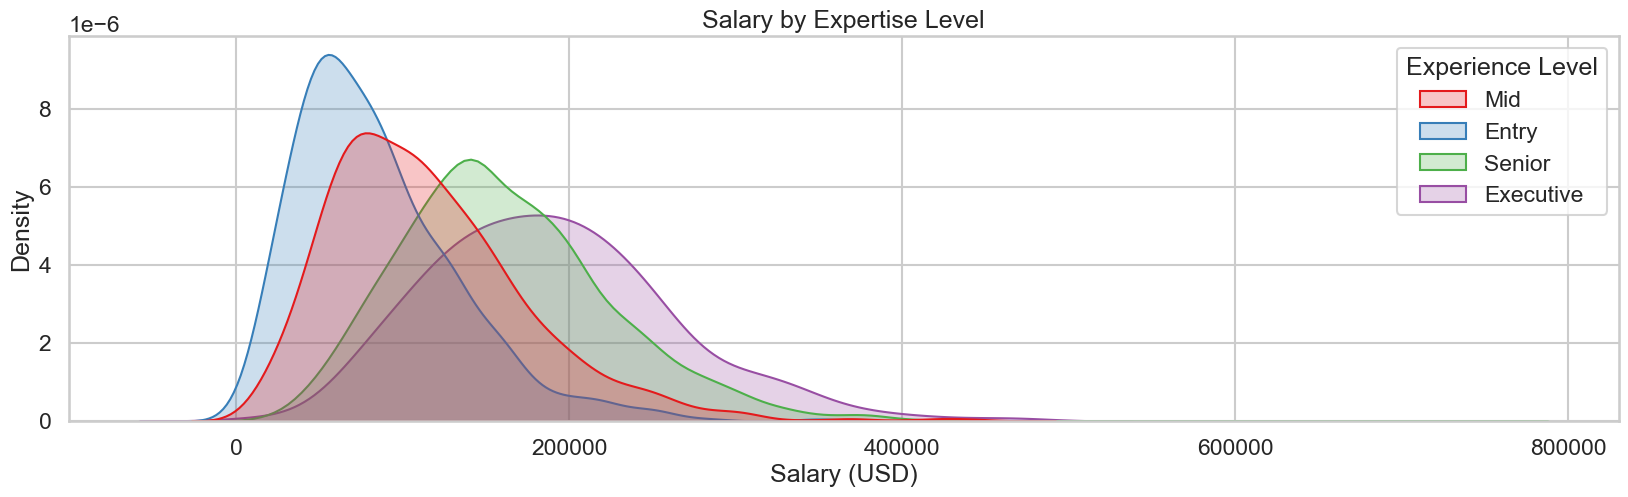

In [104]:
# KDE plot for salary distribution by Expertise Level
plt.figure(figsize=(20, 5))
sns.kdeplot(data_science_df, x='Salary', common_norm=False, fill=True, hue = 'Experience Level', palette='Set1')
plt.title('Salary by Expertise Level')
plt.xlabel('Salary (USD)')
plt.show()

## Preprocessing Data

### Encoding Oridinal Features

In [105]:
# create a copy of the df (contains top 20 most common job titles)
top_20_job_titles = data_science_df['Job Title'].value_counts().head(20).index

# filter the dataframe to include only rows with these job titles and create a deep copy
data_science_2_df = data_science_df[data_science_df['Job Title'].isin(top_20_job_titles)].copy()

# define the categories based on their rank for selected columns
ordinal_encoder = OrdinalEncoder(categories=[
    ['Entry', 'Mid', 'Senior', 'Executive'],  # Experience Level
    ['Small', 'Medium', 'Large'],  # Company Size
])

# apply encoder to the copy dataset
data_science_2_df[['Experience Level', 'Company Size']] = ordinal_encoder.fit_transform(
    data_science_2_df[['Experience Level', 'Company Size']]
)

data_science_2_df.head()

Job Title Employment Type  Experience Level  \
0                  Data Engineer       Full-Time               1.0   
1                  Data Engineer       Full-Time               1.0   
2                   Data Analyst       Full-Time               0.0   
3                   Data Analyst       Full-Time               0.0   
8  Business Intelligence Analyst       Full-Time               2.0   

  Company Location  Salary Employee Residence  Company Size  Year  
0    United States  138000      United States           1.0  2024  
1    United States   86000      United States           1.0  2024  
2    United States  179000      United States           1.0  2024  
3    United States  112000      United States           1.0  2024  
8    United States  127000      United States           1.0  2024

We begin by creating a new dataframe called `data_science_2_df` that includes only the top 20 most frequent job titles. This step helps eliminate less common job titles that could negatively impact performance.

Next, we encode ordinal features. Ordinal data refers to data that has a specific ranking or order (Bhandari, 2020). For instance, 

- **Experience Level**: Junior (1) < Intermediate (2) < Expert (3) < Executive (4)

- **Company Size**: Small (1) < Medium (2) < Large (3)

Each feature has been assigned a corresponding integer value, where higher values indicate a higher rank. These categories follow a clear hierarchy, making it suitable to convert them into numerical values using Sklearn's OrdinalEncoder.

### Encoding Nominal Features

In [106]:
# one-hot encoding for 'Job Titles', 'Company Location' and 'Employee Residence' columns
data_science_2_df = pd.get_dummies(data_science_2_df, columns=['Job Title', 'Employment Type','Company Location', 'Employee Residence'])
data_science_2_df.head()

Experience Level  Salary  Company Size  Year  Job Title_AI Engineer  \
0               1.0  138000           1.0  2024                  False   
1               1.0   86000           1.0  2024                  False   
2               0.0  179000           1.0  2024                  False   
3               0.0  112000           1.0  2024                  False   
8               2.0  127000           1.0  2024                  False   

   Job Title_Analytics Engineer  Job Title_Applied Scientist  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
8                         False                        False   

   Job Title_Business Intelligence Analyst  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
8                                     True   

   Job Title_Business Intelligence Engineer  Job Title_Data Analyst  ...  \
0                                     False                   False  ...   
1                                     False                   False  ...   
2                                     False                    True  ...   
3                                     False                    True  ...   
8                                     False                   False  ...   

   Employee Residence_Switzerland  Employee Residence_Thailand  \
0                           False                        False   
1                           False                        False   
2                           False                        False   
3                           False                        False   
8                           False                        False   

   Employee Residence_Turkey  Employee Residence_Uganda  \
0                      False                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
8                      False                      False   

   Employee Residence_Ukraine  Employee Residence_United Arab Emirates  \
0                       False                                    False   
1                       False                                    False   
2                       False                                    False   
3                       False                                    False   
8                       False                                    False   

   Employee Residence_United Kingdom  Employee Residence_United States  \
0                              False                              True   
1                              False                              True   
2                              False                              True   
3                              False                              True   
8                              False                              True   

   Employee Residence_Uzbekistan  Employee Residence_Viet Nam  
0                          False                        False  
1                          False                        False  
2                          False                        False  
3                          False                        False  
8                          False                        False  

[5 rows x 157 columns]

**Job Titles**, **Employment Type**, **Company Location**, and **Employee Residence** are considered nominal features because they represent mutually exclusive categories within a variable, with no inherent order or ranking (Bhandari, 2020). These categories cannot be meaningfully arranged in a hierarchy. For instance, gender, country names (such as **Company Location** and **Employee Residence**), **Employment Types** (where individuals may prefer freelance or part-time work over full-time employment), and job titles all fall into this category.

To handle these nominal features, we will use Pandas' `get_dummies` function to convert them into separate binary columns for each category. While this method prevents any unintentional ordinal relationships from being introduced by the model, it does have the downside of increasing dataset complexity. In our case, this results in a significant expansion from 8 columns to 157. Despite the added complexity, this approach ensures that the models treat each category independently without assuming any inherent order.

### Correlation Graph

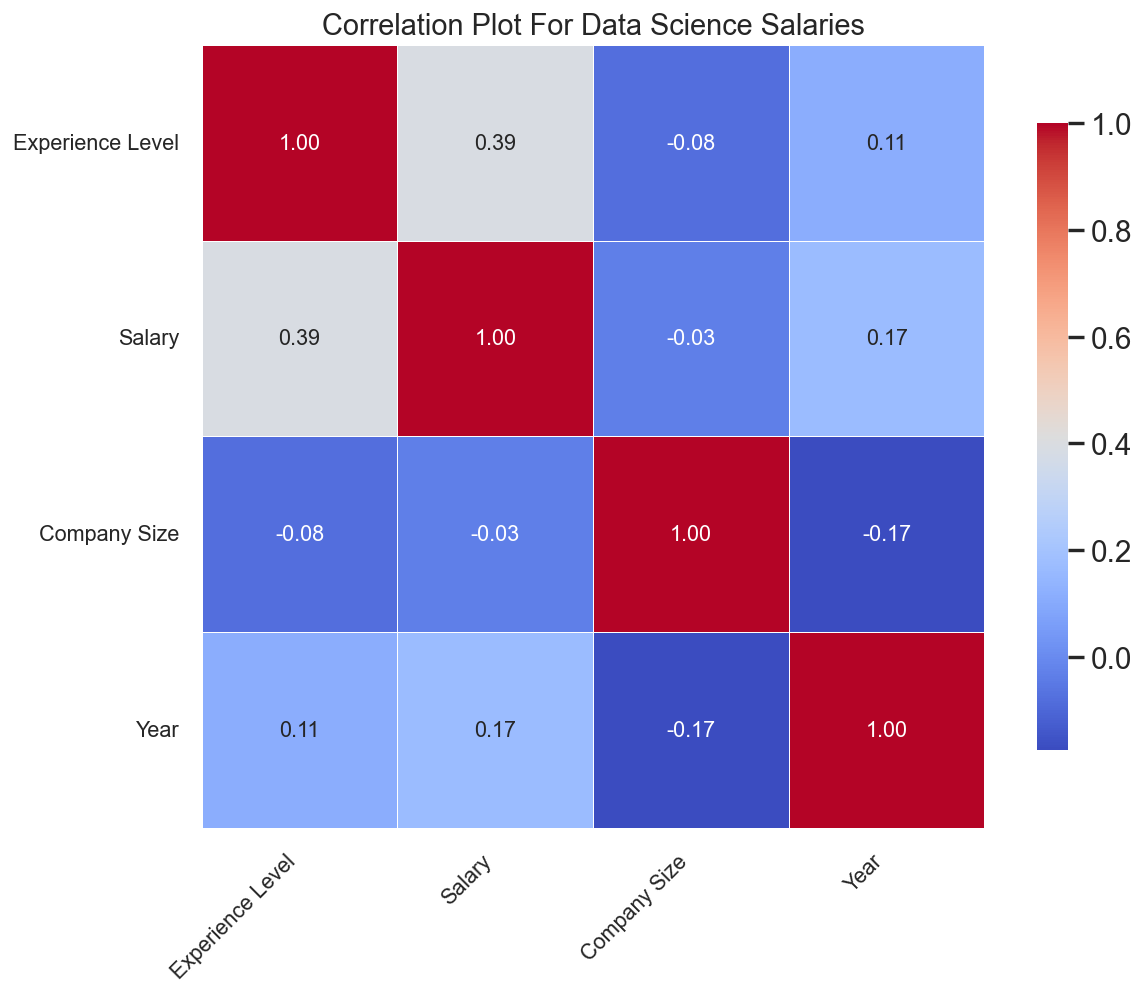

In [107]:
selected_columns = ['Experience Level', 'Salary', 'Company Size', 'Year']

# compute the correlation matrix for the selected columns
corr_matrix = data_science_2_df[selected_columns].corr()

plt.figure(figsize=[10, 8], dpi=130)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", annot_kws={"fontsize": 12}, fmt='.2f', 
            cbar_kws={'shrink': 0.8}, square=True, linewidths=0.5)
plt.title("Correlation Plot For Data Science Salaries", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12) 
plt.tight_layout()
plt.show()

### Observations:

- There is a moderate positive correlation of 0.39 between Experience Level and Salary, suggesting that as experience increases, salary tends to rise as well.

- A weaker positive correlation of 0.17 exists between Salary and Year, implying that salaries in data science have generally increased from 2020 to 2024. However, it’s important to note that the data is not evenly distributed across these years, with 2023 accounting for nearly 75% of the total records.

- An inverse correlation of -0.17 between Company Size and Year suggests that as the years progress, the average company size appears to decrease. This could be indicative of a rise in smaller startups being formed in the more recent years.

# Building ML Models

## Skewness and Scaling Dataset

Before scaling, we'll first take a look at how skewed the features are.

In [108]:
data_science_2_df.skew(axis = 0)

Experience Level                           -0.912545
Salary                                      0.861094
Company Size                                1.292072
Year                                       -1.666393
Job Title_AI Engineer                      10.141773
                                             ...    
Employee Residence_United Arab Emirates    49.310236
Employee Residence_United Kingdom           3.631375
Employee Residence_United States           -1.595523
Employee Residence_Uzbekistan              40.249215
Employee Residence_Viet Nam                40.249215
Length: 157, dtype: float64

Skewness measures the asymmetry in a dataset's distribution (Turney, 2022). Below is an interpretation guide for skewness values:

### Skewness Value Interpretation:
   - **Skewness = 0**: Indicates a perfectly symmetric distribution, such as a normal distribution (Turney, 2022).
   - **Skewness > 0**: Represents a positively skewed (right-skewed) distribution where the tail extends to the right. This implies most values are clustered at the lower end, with a few extreme higher values (Turney, 2022).
   - **Skewness < 0**: Represents a negatively skewed (left-skewed) distribution where the tail extends to the left. Most values are concentrated at the higher end, with a few extreme lower values (Turney, 2022).

### Magnitude of Skewness:
   - **Between -0.5 and 0.5**: Distribution is relatively symmetric.
   - **Between -1 and -0.5 or 0.5 and 1**: Indicates moderate skewness.
   - **Less than -1 or greater than 1**: Indicates high skewness.

### Analysing data_science_2_df's Skewness

1. **Experience Level** (-0.912545):  
   - This is moderately left-skewed, indicating a higher concentration of individuals in senior experience levels (e.g., Senior and Executive) and fewer in entry-level roles. This aligns with previous observations showing that senior-level employees constitute over 60% of the data, followed by mid-level employees at around 25%.

2. **Salary** (0.861094):  
   - This is moderately right-skewed, indicating that most salaries are at the lower end, with a few significantly higher salaries pulling the tail to the right. This is evident in some executive-level employees earning over $400,000.

3. **Company Size** (1.292072):  
   - This is highly right-skewed, suggesting that the majority of companies are medium-sized, while only a small fraction are large or small. Previous analysis showed that medium-sized companies account for approximately 88% of the data, large companies for 9%, and small companies for just 3%.

4. **Year** (-1.666393):  
   - This is highly left-skewed, reflecting the dominance of recent years in the dataset. Most records are from 2023, with fewer entries for earlier years.

5. **Categorical Features (`Job Titles`, `Employment Type`, and `Employee Residence`)**:  
   - These features exhibit extreme positive or negative skewness due to one-hot encoding, which creates binary columns (1 for presence, 0 for absence). Skewness in these columns highlights the frequency imbalance between categories.  

   - **`Job Title_AI Engineer`** (10.141773): Indicates that most individuals do not have "AI Engineer" as their job title.
   
   - **`Employee Residence_United Arab Emirates`** (49.310236): Indicates very few individuals from the dataset reside in the UAE.

### Scaling the Dataset

In [109]:
# selected ordinal numerical features
numerical_features = ['Experience Level', 'Salary', 'Company Size', 'Year']

# initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# normalize numerical features
data_science_2_df[numerical_features] = minmax_scaler.fit_transform(data_science_2_df[numerical_features])
data_science_2_df.head()

Experience Level    Salary  Company Size  Year  Job Title_AI Engineer  \
0          0.333333  0.167347           0.5   1.0                  False   
1          0.333333  0.096599           0.5   1.0                  False   
2          0.000000  0.223129           0.5   1.0                  False   
3          0.000000  0.131973           0.5   1.0                  False   
8          0.666667  0.152381           0.5   1.0                  False   

   Job Title_Analytics Engineer  Job Title_Applied Scientist  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
8                         False                        False   

   Job Title_Business Intelligence Analyst  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
8                                     True   

   Job Title_Business Intelligence Engineer  Job Title_Data Analyst  ...  \
0                                     False                   False  ...   
1                                     False                   False  ...   
2                                     False                    True  ...   
3                                     False                    True  ...   
8                                     False                   False  ...   

   Employee Residence_Switzerland  Employee Residence_Thailand  \
0                           False                        False   
1                           False                        False   
2                           False                        False   
3                           False                        False   
8                           False                        False   

   Employee Residence_Turkey  Employee Residence_Uganda  \
0                      False                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
8                      False                      False   

   Employee Residence_Ukraine  Employee Residence_United Arab Emirates  \
0                       False                                    False   
1                       False                                    False   
2                       False                                    False   
3                       False                                    False   
8                       False                                    False   

   Employee Residence_United Kingdom  Employee Residence_United States  \
0                              False                              True   
1                              False                              True   
2                              False                              True   
3                              False                              True   
8                              False                              True   

   Employee Residence_Uzbekistan  Employee Residence_Viet Nam  
0                          False                        False  
1                          False                        False  
2                          False                        False  
3                          False                        False  
8                          False                        False  

[5 rows x 157 columns]

MinMaxScaler is a more suitable choice for scaling ordinal features like **Experience Level**, **Company Size**, and **Year**, especially since these features contain outliers (e.g., uncommon experience levels, company sizes, or years with fewer data points). Removing outliers would result in a significant reduction of the dataset, which is not ideal, given that we only have about 4,860 records after selecting the top 20 job titles.

Additionally, since the data is not normally distributed. This was observed in our case as none of the ordinal features follow a Gaussian distribution. 

MinMaxScaler effectively preserves the **relative ranking** of ordinal data (e.g., Entry < Mid < Senior), scaling the values within a fixed range without losing their inherent order (McShane, 2024). 

On the other hand, **StandardScaler** assumes a Gaussian distribution, where data is expected to be symmetrically distributed around the mean, which is not the case for our dataset (McShane, 2024). Even if we applied StandardScaler, the results may not be optimal due to the data’s skewed nature, making **MinMaxScaler** a better option for normalization in this scenario.

In [110]:
# selected one-hot encoded categorical features
categorical_features = data_science_2_df.columns[data_science_2_df.columns.str.startswith(('Job Title_', 'Employee Residence_', 'Company Location_'))]

# initialize MaxAbsScaler
maxabs_scaler = MaxAbsScaler()

# scale categorical features
data_science_2_df[categorical_features] = maxabs_scaler.fit_transform(data_science_2_df[categorical_features])
data_science_2_df.head()

Experience Level    Salary  Company Size  Year  Job Title_AI Engineer  \
0          0.333333  0.167347           0.5   1.0                    0.0   
1          0.333333  0.096599           0.5   1.0                    0.0   
2          0.000000  0.223129           0.5   1.0                    0.0   
3          0.000000  0.131973           0.5   1.0                    0.0   
8          0.666667  0.152381           0.5   1.0                    0.0   

   Job Title_Analytics Engineer  Job Title_Applied Scientist  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
8                           0.0                          0.0   

   Job Title_Business Intelligence Analyst  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
8                                      1.0   

   Job Title_Business Intelligence Engineer  Job Title_Data Analyst  ...  \
0                                       0.0                     0.0  ...   
1                                       0.0                     0.0  ...   
2                                       0.0                     1.0  ...   
3                                       0.0                     1.0  ...   
8                                       0.0                     0.0  ...   

   Employee Residence_Switzerland  Employee Residence_Thailand  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
8                             0.0                          0.0   

   Employee Residence_Turkey  Employee Residence_Uganda  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
8                        0.0                        0.0   

   Employee Residence_Ukraine  Employee Residence_United Arab Emirates  \
0                         0.0                                      0.0   
1                         0.0                                      0.0   
2                         0.0                                      0.0   
3                         0.0                                      0.0   
8                         0.0                                      0.0   

   Employee Residence_United Kingdom  Employee Residence_United States  \
0                                0.0                               1.0   
1                                0.0                               1.0   
2                                0.0                               1.0   
3                                0.0                               1.0   
8                                0.0                               1.0   

   Employee Residence_Uzbekistan  Employee Residence_Viet Nam  
0                            0.0                          0.0  
1                            0.0                          0.0  
2                            0.0                          0.0  
3                            0.0                          0.0  
8                            0.0                          0.0  

[5 rows x 157 columns]

I have opted for **MaxAbsScaler** because it keeps the original relationships between features intact. Additionally, it is well-suited for datasets with sparse features (**Employment Type**, **Company Location**, and **Employee Residence**). Finally, scaling with MaxAbsScaler retains the interpretability of the features, which helps in understanding the impact of the scaled data on the models.

The **MaxAbsScaler** works by dividing each feature by its maximum absolute value across the entire dataset. This makes sure that all values are within the [-1, 1] range, without altering the distribution of the data. As a result, the relationships and characteristics of the data are maintained, making it a reliable scaling method (Admin, 2023).

## Feature Selection

In [111]:
# independent variables (all columns except Salary)
X = data_science_2_df.drop(columns=["Salary"])

# dependent variables
y = data_science_2_df["Salary"]
y.value_counts()

Salary
0.115646    58
0.183673    55
0.142857    49
0.088435    43
0.251701    42
            ..
0.380952     1
0.129592     1
0.271156     1
0.530612     1
0.108388     1
Name: count, Length: 1870, dtype: int64

## Train/Test Splits

### Training Algorithm and Train-Test Split
Both models will be trained using two Test/Train dataset splits, where a portion is reserved for training and another for testing. We will be using **70-30%** and **80-20%** split, though there is no fixed rule for the ideal ratio. The key is to ensure that there is sufficient training data for the model to learn from while leaving enough test data to properly evaluate its performance (Prabhakaran, 2022). The training set helps the models learn the relationships between the features and salary, while the test set is used to assess how well the model generalizes to unseen data, mimicking real-world prediction scenarios.

### Create 20/80 split.

In [112]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state = 10)
print('X_Train_2:', X_train_2.shape)
print('X_Test_2:', X_test_2.shape)
print('y_Train_2:', y_train_2.shape)
print('y_Test_2:', y_test_2.shape)

X_Train_2: (3892, 156)
X_Test_2: (974, 156)
y_Train_2: (3892,)
y_Test_2: (974,)


### Create 30/70 split.

In [113]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.3, random_state = 10)
print('X_Train_3:', X_train_3.shape)
print('X_Test_3:', X_test_3.shape)
print('y_Train_3:', y_train_3.shape)
print('y_Test_3:', y_test_3.shape)

X_Train_3: (3406, 156)
X_Test_3: (1460, 156)
y_Train_3: (3406,)
y_Test_3: (1460,)


We will use these two Test/Train splits to assess how this affects the training models.

# (Q3) & (Q5)

## Evaulation Metics And Cross Validation

Before we start training LR and RFR models, it is essential to select appropriate metrics to evaluate their performance.. So There are several metrics that can be used to assess the performance of LR and RFR models. Below, we will explore and explain why these metrics are particularly suitable for evaluating our regression models in the context of salary prediction.

For predicting data science salaries, the most common metrics for evaulating the performance of regression tasks are:

1. **Mean Absolute Error (MAE)**:  
   MAE calculates the average of the absolute differences between predicted and actual salary values. It is simple and easy to interpret, as it shows how far off, on average, the model's predictions are from the true values. As it only considers the magnitude of the errors, regardless of their direction, underprediction and overprediction are treated equally (Lewinson, 2023).

2. **Mean Squared Error (MSE)**:  
   MSE computes the average of the squared differences between predicted and actual salary values. It gives more weight to larger errors, making it especially sensitive to outliers. MSE is valuable when it is important to penalize larger prediction errors, but it can be harder to interpret, as it is not expressed in the same units as the original data (Lewinson, 2023).

3. **Root Mean Squared Error (RMSE)**:  
   RMSE is the square root of MSE, and it is widely used due to its ability to return the error value in the same units as the original salary data, making it easier to understand. Like MSE, it also emphasizes larger errors over smaller ones, which can be useful when minimizing significant deviations in predictions (Lewinson, 2023).

4. **R-squared (R²)**:  
   R² measures how much of the variance in salary can be explained by the independent variables. It helps to determine the goodness of fit of the model. A higher R² value indicates that the model explains more of the variance in salary, while a lower value suggests a poor fit. However, R² does not account for model bias, and a high R² value can sometimes indicate overfitting (Lewinson, 2023).

In general, R² is a good starting point for evaluating regression models, as it provides an indication of how well the model fits the data and how much of the salary variance is captured by the features. RMSE is also important, particularly if we want to understand the magnitude of errors in salary predictions. Combining R² and RMSE gives a more complete assessment of model performance, providing insights into both the goodness of fit and error size.

### K-Fold Cross-Validation

To ensure the models deliver accurate and consistent results, we will implement K-fold cross-validation. This method helps prevent models from being overly influenced by a single random split of training and testing data. K-fold cross-validation is a resampling technique used to evaluate ML models, especially when working with limited datasets like `Latest Data Science Salaries`. 

The process involves dividing the dataset into `K` equally sized folds. For each fold, one subset is designated as the test set, while the remaining folds form the training set. This process is repeated `K` times so that each fold serves as the test set exactly once. The results from all iterations are then averaged to provide a reliable estimate for the chosen evaluation metrics (Balaji Nalawade, 2024).

In our case, we'll apply cross-validation to both the training and test datasets to calculate metrics such as MSE, RMSE, and R². I've chosen \(k = 10\), as this provides a robust assessment of model performance by ensuring every data point is used for both training and testing.

#### Advantages of K-fold Cross-Validation:
1. **Maximizing Data Utilization**: By rotating through test and training sets, every data point contributes to both model training and evaluation (Balaji Nalawade, 2024). This is particularly valuable when working with small datasets, like our case with `Latest Data Science Salaries`.

2. **Reduced Bias**: Because each data point is used in both a test and training set, the method minimizes biases that may arise from random data splitting (Balaji Nalawade, 2024).

#### Disadvantages of K-fold Cross-Validation:
The main drawback of K-fold cross-validation is its increased computational cost, as the model needs to be trained and evaluated \(k\) times (Balaji Nalawade, 2024). However, the trade-off is worthwhile for the enhanced reliability and accuracy of performance metrics.

In [114]:
results = [] # create list to store performance results for each model
results.clear()

# (Q4)

## ML Model Naming System

Each machine learning model in this setup is labeled according to its hyperparameter configuration and the train/test split ratio. For example, a random forest regression model might be labeled as `RFR_HP1_30`, where `RFR` refers to the random forest regressor, `HP1` indicates the first hyperparameter configuration (such as n_estimators = 1 and max_depth = 1), and `30` specifies that the model uses a 30% test / 70% train data split. Similarly, `RFR_HP1_20` would have the same hyperparameter values, but with a 20% test / 80% train split.

## Random Forest Regression

Let’s begin training and evaluating Random Forest Regressor (RFR) models with various hyperparameter configurations and test/train splits. Below is the list of parameter combinations tested for the RandomForestRegressor model across both 20/80 and 30/70 splits  

1. `RandomForestRegressor(n_estimators=1, max_depth=1, random_state=0)`  
2. `RandomForestRegressor(n_estimators=10, max_depth=1, random_state=0)`  
3. `RandomForestRegressor(n_estimators=1, max_depth=10, random_state=0)`  
4. `RandomForestRegressor(n_estimators=10, max_depth=10, random_state=0)`  
5. `RandomForestRegressor(n_estimators=10, max_depth=15, random_state=0)`  
6. `RandomForestRegressor(n_estimators=25, max_depth=15, random_state=0)`  
7. `RandomForestRegressor(n_estimators=25, max_depth=15, random_state=0)`  
8. `RandomForestRegressor(n_estimators=35, max_depth=15, random_state=0)`  
9. `RandomForestRegressor(n_estimators=50, max_depth=15, random_state=0)`  

Our focus will be on tuning two key hyperparameters for the Random Forest Regressor (RFR): **n_estimators** and **max_depth**. The **random_state** parameter is set to 0, serving as a seed to ensure reproducibility of the results.  

- **n_estimators**: Specifies the number of trees in the forest (scikit-learn, 2024).  
- **max_depth**: Defines the maximum depth of each tree (scikit-learn, 2024).

Instead of displaying the results for all combinations here, I’ve selected five cases that illustrate how tuning these hyperparameters and using different test/train configurations impact the performance of the **RandomForestRegressor** model. These cases provide insights into the relationship between the number of estimators, tree depth, and the resulting model accuracy, helping to understand the trade-offs involved in hyperparameter tuning.

### Hyperparameters 1 (RFR_HP1_30)
- 30/70 split
- n_estimators = 1
- max_depth = 1
- random_state = 0

In [115]:
# create RandomForestRegressor model and train the model
rf_model = RandomForestRegressor(n_estimators=1, max_depth=1, random_state=0)
rf_model.fit(X_train_3, y_train_3)

# train data cross validation
cv_mse_train = cross_val_score(rf_model, X_train_3, y_train_3, scoring='neg_mean_squared_error', cv=10)
mean_cv_mse_train = round(-cv_mse_train.mean(), 3)
std_cv_mse_train = round(cv_mse_train.std(), 6)

# training data cross validation for RMSE
cv_rmse_train = np.sqrt(-cv_mse_train)
mean_cv_rmse_train = round(cv_rmse_train.mean(), 3)
std_cv_rmse_train = round(cv_rmse_train.std(), 6)

# training data cross validation for R²
cv_r2_train = cross_val_score(rf_model, X_train_3, y_train_3, scoring='r2', cv=10)
mean_cv_r2_train = round(cv_r2_train.mean(), 3)
std_cv_r2_train = round(cv_r2_train.std(), 6)


# test data cross validation for MSE
cv_mse_test = cross_val_score(rf_model, X_test_3, y_test_3, scoring='neg_mean_squared_error', cv=10)
mean_cv_mse_test = round(-cv_mse_test.mean(), 3)  # make value positive
std_cv_mse_test = round(cv_mse_test.std(), 6)

# test data cross validation for RMSE
cv_rmse_test = np.sqrt(-cv_mse_test)
mean_cv_rmse_test = round(cv_rmse_test.mean(), 3)
std_cv_rmse_test = round(cv_rmse_test.std(), 6)

# test data cross validation for R²
cv_r2_test = cross_val_score(rf_model, X_test_3, y_test_3, scoring='r2', cv=10)
mean_cv_r2_test = round(cv_r2_test.mean(), 3)
std_cv_r2_test = round(cv_r2_test.std(), 6)

# store results in dictionary
results.append(
    {
    'Model': 'RFR_HP1_30',
    'Split': '30/70',
    'MSE_train': float(mean_cv_mse_train),
    'RMSE_train': float(mean_cv_rmse_train),
    'r2_train': float(mean_cv_r2_train),
    
    'MSE_test': float(mean_cv_mse_test),
    'RMSE_test': float(mean_cv_rmse_test),
    'r2_test': float(mean_cv_r2_test)
    }
)

print("Train Data")
print(f'Mean Squared Error (MSE): {mean_cv_mse_train} ± {std_cv_mse_train}')
print(f'Root Mean Squared Error (RMSE): {mean_cv_rmse_train} ± {std_cv_rmse_train}')
print(f'R-Squared: {mean_cv_r2_train} ± {std_cv_r2_train}')

print("\nTest Data")
print(f'Mean Squared Error (MSE): {mean_cv_mse_test} ± {std_cv_mse_test}')
print(f'Root Mean Squared Error (RMSE): {mean_cv_rmse_test} ± {std_cv_rmse_test}')
print(f'R-Squared: {mean_cv_r2_test} ± {std_cv_r2_test}')

Train Data
Mean Squared Error (MSE): 0.007 ± 0.000583
Root Mean Squared Error (RMSE): 0.086 ± 0.003436
R-Squared: 0.131 ± 0.027278

Test Data
Mean Squared Error (MSE): 0.007 ± 0.00144
Root Mean Squared Error (RMSE): 0.085 ± 0.008349
R-Squared: 0.146 ± 0.066753


### Observations:
This model `RFR_HP1_30` has the lowest number of estimators at 1 and a shallow depth of 1. The MSE is relatively high on both training and test sets, indicating that the model has room for improvement. The R² value for train and test data is also low, which indicates that the model explains only a small proportion of the variance in the target variable. Let's increase the number of estimators and depth and see how this affects the model performance.

### Hyperparameters 2 (RFR_HP2_20)
- 20/80 Test/Train split
- n_estimators = 10
- max_depth = 10
- random_state = 0

In [116]:
# create RandomForestRegressorModel and train the model
rf_model_2 = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=0)
rf_model_2.fit(X_train_2, y_train_2)

# train data cross validation
cv_mse_train_2 = cross_val_score(rf_model_2, X_train_2, y_train_2, scoring='neg_mean_squared_error', cv=10)
mean_cv_mse_train_2 = round(-cv_mse_train_2.mean(), 3)
std_cv_mse_train_2 = round(cv_mse_train_2.std(), 6)

# training data cross validation for RMSE
cv_rmse_train_2 = np.sqrt(-cv_mse_train_2)
mean_cv_rmse_train_2 = round(cv_rmse_train_2.mean(), 3)
std_cv_rmse_train_2 = round(cv_rmse_train_2.std(), 6)

# training data cross validation for R²
cv_r2_train_2 = cross_val_score(rf_model_2, X_train_2, y_train_2, scoring='r2', cv=10)
mean_cv_r2_train_2 = round(cv_r2_train_2.mean(), 3)
std_cv_r2_train_2 = round(cv_r2_train_2.std(), 6)


# test data cross validation for MSE
cv_mse_test_2 = cross_val_score(rf_model_2, X_test_2, y_test_2, scoring='neg_mean_squared_error', cv=10)
mean_cv_mse_test_2 = round(-cv_mse_test_2.mean(), 3)  # make value positive
std_cv_mse_test_2 = round(cv_mse_test_2.std(), 6)

# test data cross validation for RMSE
cv_rmse_test_2 = np.sqrt(-cv_mse_test_2)
mean_cv_rmse_test_2 = round(cv_rmse_test_2.mean(), 3)
std_cv_rmse_test_2 = round(cv_rmse_test_2.std(), 6)

# test data cross validation for R²
cv_r2_test = cross_val_score(rf_model_2, X_test_2, y_test_2, scoring='r2', cv=10)
mean_cv_r2_test = round(cv_r2_test.mean(), 3)
std_cv_r2_test = round(cv_r2_test.std(), 6)

# store results in dictionary
results.append(
    {
    'Model': 'RFR_HP2_20',
    'Split': '20/80',
    'MSE_train': float(mean_cv_mse_train_2),
    'RMSE_train': float(mean_cv_rmse_train_2),
    'r2_train': float(mean_cv_r2_train_2),
    
    'MSE_test': float(mean_cv_mse_test_2),
    'RMSE_test': float(mean_cv_rmse_test_2),
    'r2_test': float(mean_cv_r2_test)
    }
)

print("Train Data")
print(f'Mean Squared Error (MSE): {mean_cv_mse_train_2} ± {std_cv_mse_train_2}')
print(f'Root Mean Squared Error (RMSE): {mean_cv_rmse_train_2} ± {std_cv_rmse_train_2}')
print(f'R-Squared: {mean_cv_r2_train_2} ± {std_cv_r2_train_2}')

print("\nTest Data")
print(f'Mean Squared Error (MSE): {mean_cv_mse_test_2} ± {std_cv_mse_test_2}')
print(f'Root Mean Squared Error (RMSE): {mean_cv_rmse_test_2} ± {std_cv_rmse_test_2}')
print(f'R-Squared: {mean_cv_r2_test} ± {std_cv_r2_test}')

Train Data
Mean Squared Error (MSE): 0.006 ± 0.000531
Root Mean Squared Error (RMSE): 0.075 ± 0.003653
R-Squared: 0.338 ± 0.030594

Test Data
Mean Squared Error (MSE): 0.006 ± 0.001246
Root Mean Squared Error (RMSE): 0.079 ± 0.007603
R-Squared: 0.242 ± 0.081748


### Observations:

By increasing **n_estimators** and **max_depth** to 10, the model's performance shows slight improvement compared to **RFR_HP1_30**. Specifically, MSE decreased from 0.007 to 0.006, RMSE from 0.085 to 0.079, and R² improved from 0.131 to 0.146 (an increase of nearly 12%). It's important to note that these results are based on a 20/80 split, while **RFR_HP1_30** uses a 30/70 split. Next, we'll evaluate how the model performs with the same hyperparameter configuration but using a 30/70 split.

### Hyperparameters 2 (RFR_HP2_30)
- 30/70 Test/Train split
- n_estimators = 10
- max_depth = 10
- random_state = 0

In [117]:
# create RandomForestRegressor model and train the model
rf_model_3 = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=0)
rf_model_3.fit(X_train_3, y_train_3)

# train data cross validation
cv_mse_train_3 = cross_val_score(rf_model_3, X_train_3, y_train_3, scoring='neg_mean_squared_error', cv=10)
mean_cv_mse_train_3 = round(-cv_mse_train_3.mean(), 3)
std_cv_mse_train_3 = round(cv_mse_train_3.std(), 6)

# training data cross validation for RMSE
cv_rmse_train_3 = np.sqrt(-cv_mse_train_3)
mean_cv_rmse_train_3 = round(cv_rmse_train_3.mean(), 3)
std_cv_rmse_train_3 = round(cv_rmse_train_3.std(), 6)

# training data cross validation for R²
cv_r2_train_3 = cross_val_score(rf_model_3, X_train_3, y_train_3, scoring='r2', cv=10)
mean_cv_r2_train_3 = round(cv_r2_train_3.mean(), 3)
std_cv_r2_train_3 = round(cv_r2_train_3.std(), 6)


# test data cross validation for MSE
cv_mse_test_3 = cross_val_score(rf_model_3, X_test_3, y_test_3, scoring='neg_mean_squared_error', cv=10)
mean_cv_mse_test_3 = round(-cv_mse_test_3.mean(), 3)  # make value positive
std_cv_mse_test_3 = round(cv_mse_test_3.std(), 6)

# test data cross validation for RMSE
cv_rmse_test_3 = np.sqrt(-cv_mse_test_3)
mean_cv_rmse_test_3 = round(cv_rmse_test_3.mean(), 3)
std_cv_rmse_test_3 = round(cv_rmse_test_3.std(), 6)

# test data cross validation for R²
cv_r2_test = cross_val_score(rf_model_3, X_test_3, y_test_3, scoring='r2', cv=10)
mean_cv_r2_test = round(cv_r2_test.mean(), 3)
std_cv_r2_test = round(cv_r2_test.std(), 6)

# store results in dictionary
results.append(
    {
    'Model': 'RFR_HP2_30',
    'Split': '30/70',
    'MSE_train': float(mean_cv_mse_train_3),
    'RMSE_train': float(mean_cv_rmse_train_3),
    'r2_train': float(mean_cv_r2_train_3),
    
    'MSE_test': float(mean_cv_mse_test_3),
    'RMSE_test': float(mean_cv_rmse_test_3),
    'r2_test': float(mean_cv_r2_test)
    }
)

print("Train Data")
print(f'Mean Squared Error (MSE): {mean_cv_mse_train_3} ± {std_cv_mse_train_3}')
print(f'Root Mean Squared Error (RMSE): {mean_cv_rmse_train_3} ± {std_cv_rmse_train_3}')
print(f'R-Squared: {mean_cv_r2_train_3} ± {std_cv_r2_train_3}')

print("\nTest Data")
print(f'Mean Squared Error (MSE): {mean_cv_mse_test_3} ± {std_cv_mse_test_3}')
print(f'Root Mean Squared Error (RMSE): {mean_cv_rmse_test_3} ± {std_cv_rmse_test_3}')
print(f'R-Squared: {mean_cv_r2_test} ± {std_cv_r2_test}')

Train Data
Mean Squared Error (MSE): 0.006 ± 0.000451
Root Mean Squared Error (RMSE): 0.076 ± 0.00301
R-Squared: 0.323 ± 0.025985

Test Data
Mean Squared Error (MSE): 0.007 ± 0.001349
Root Mean Squared Error (RMSE): 0.081 ± 0.008192
R-Squared: 0.222 ± 0.125266


### Observations:

Interestingly, **RFR_HP2_30** performs slightly worse than **RFR_HP2_20** across all metrics. MSE increased to 0.007, and RMSE rose to 0.081, closely aligning with the results of **RFR_HP1_30**. Additionally, R² declined by approximately 8% compared to **RFR_HP2_20**, although it remains marginally better than **RFR_HP1_30**. Despite the similar performance on the training data for both **RFR_HP2_20** and **RFR_HP2_30**, the latter shows slightly worse performance on the test data. This could be due to overfitting caused by the smaller training data portion (70%) combined with the model's increased complexity.

The disparity between **RFR_HP2_30**'s train and test performance highlights this overfitting issue. For instance, R² drops significantly from 0.323 to 0.222, indicating the model struggles to generalize effectively due to the dataset's complexity.

### Hyperparameters 3 (RFR_HP3_20)
- 20/80 Test/Train split
- n_estimators = 50
- max_depth = 15
- random_state = 0

In [118]:
# create RandomForestRegressor model and train the model
rf_model_4 = RandomForestRegressor(n_estimators=50, max_depth=15, random_state=0)
rf_model_4.fit(X_train_2, y_train_2)

# train data cross validation
cv_mse_train_4 = cross_val_score(rf_model_4, X_train_2, y_train_2, scoring='neg_mean_squared_error', cv=10)
mean_cv_mse_train_4 = round(-cv_mse_train_4.mean(), 3)
std_cv_mse_train_4 = round(cv_mse_train_4.std(), 6)

# training data cross validation for RMSE
cv_rmse_train_4 = np.sqrt(-cv_mse_train_4)
mean_cv_rmse_train_4 = round(cv_rmse_train_4.mean(), 3)
std_cv_rmse_train_4 = round(cv_rmse_train_4.std(), 6)

# training data cross validation for R²
cv_r2_train_4 = cross_val_score(rf_model_4, X_train_2, y_train_2, scoring='r2', cv=10)
mean_cv_r2_train_4 = round(cv_r2_train_4.mean(), 3)
std_cv_r2_train_4 = round(cv_r2_train_4.std(), 6)


# test data cross validation for MSE
cv_mse_test_4 = cross_val_score(rf_model_4, X_test_2, y_test_2, scoring='neg_mean_squared_error', cv=10)
mean_cv_mse_test_4 = round(-cv_mse_test_4.mean(), 3)  # make value positive
std_cv_mse_test_4 = round(cv_mse_test_4.std(), 6)

# test data cross validation for RMSE
cv_rmse_test_4 = np.sqrt(-cv_mse_test_4)
mean_cv_rmse_test_4 = round(cv_rmse_test_4.mean(), 3)
std_cv_rmse_test_4 = round(cv_rmse_test_4.std(), 6)

# test data cross validation for R²
cv_r2_test = cross_val_score(rf_model_4, X_test_2, y_test_2, scoring='r2', cv=10)
mean_cv_r2_test = round(cv_r2_test.mean(), 3)
std_cv_r2_test = round(cv_r2_test.std(), 6)

# store results in dictionary
results.append(
    {
    'Model': 'RFR_HP3_20',
    'Split': '20/80',
    'MSE_train': float(mean_cv_mse_train_4),
    'RMSE_train': float(mean_cv_rmse_train_4),
    'r2_train': float(mean_cv_r2_train_4),
    
    'MSE_test': float(mean_cv_mse_test_4),
    'RMSE_test': float(mean_cv_rmse_test_4),
    'r2_test': float(mean_cv_r2_test)
    }
)

print("Train Data")
print(f'Mean Squared Error (MSE): {mean_cv_mse_train_4} ± {std_cv_mse_train_4}')
print(f'Root Mean Squared Error (RMSE): {mean_cv_rmse_train_4} ± {std_cv_rmse_train_4}')
print(f'R-Squared: {mean_cv_r2_train_4} ± {std_cv_r2_train_4}')

print("\nTest Data")
print(f'Mean Squared Error (MSE): {mean_cv_mse_test_4} ± {std_cv_mse_test_4}')
print(f'Root Mean Squared Error (RMSE): {mean_cv_rmse_test_4} ± {std_cv_rmse_test_4}')
print(f'R-Squared: {mean_cv_r2_test} ± {std_cv_r2_test}')

Train Data
Mean Squared Error (MSE): 0.006 ± 0.000553
Root Mean Squared Error (RMSE): 0.075 ± 0.003814
R-Squared: 0.337 ± 0.036396

Test Data
Mean Squared Error (MSE): 0.006 ± 0.001207
Root Mean Squared Error (RMSE): 0.08 ± 0.007284
R-Squared: 0.227 ± 0.098114


Overall, we've observed that increasing **n_estimators** and **max_depth** from 1 to 10 improved performance. Now, we'll examine the impact of further increasing these hyperparameters to **n_estimators = 50** and **max_depth = 15**. Comparing results with **RFR_HP2_20** on a 20/80 split, there is little to no improvement in the training dataset performance. For the test data, MSE and RMSE remain virtually unchanged, indicating minimal performance differences. However, test R² slightly declines to 0.227 compared to 0.242 for **RFR_HP2_20**, though it is marginally better than **RFR_HP2_30** at 0.222. 

This suggests that increasing the number of estimators and tree depth does not lead to better generalization to unseen data, despite these parameters typically aiding in handling more complex datasets. While the model becomes more intricate, it does not result in a meaningful performance boost. Next, we'll evaluate whether using a 30/70 test/train split with these **Hyperparameter 3** settings yields any improvements.

### Hyperparameters 3 (RFR_HP3_30)
- 30/70 Test/Train split
- n_estimators = 50
- max_depth = 15
- random_state = 0

In [119]:
# create RandomForestRegressorModel and train the model
rf_model_5 = RandomForestRegressor(n_estimators=50, max_depth=15, random_state=0)
rf_model_5.fit(X_train_3, y_train_3)

# train data cross validation
cv_mse_train_5 = cross_val_score(rf_model_5, X_train_3, y_train_3, scoring='neg_mean_squared_error', cv=10)
mean_cv_mse_train_5 = round(-cv_mse_train_5.mean(), 3)
std_cv_mse_train_5 = round(cv_mse_train_5.std(), 6)

# training data cross validation for RMSE
cv_rmse_train_5 = np.sqrt(-cv_mse_train_5)
mean_cv_rmse_train_5 = round(cv_rmse_train_5.mean(), 3)
std_cv_rmse_train_5 = round(cv_rmse_train_5.std(), 6)

# training data cross validation for R²
cv_r2_train_5 = cross_val_score(rf_model_5, X_train_3, y_train_3, scoring='r2', cv=10)
mean_cv_r2_train_5 = round(cv_r2_train_5.mean(), 3)
std_cv_r2_train_5 = round(cv_r2_train_5.std(), 6)


# test data cross validation for MSE
cv_mse_test_5 = cross_val_score(rf_model_5, X_test_3, y_test_3, scoring='neg_mean_squared_error', cv=10)
mean_cv_mse_test_5 = round(-cv_mse_test_5.mean(), 3)  # make value positive
std_cv_mse_test_5 = round(cv_mse_test_5.std(), 6)

# test data cross validation for RMSE
cv_rmse_test_5 = np.sqrt(-cv_mse_test_5)
mean_cv_rmse_test_5 = round(cv_rmse_test_5.mean(), 3)
std_cv_rmse_test_5 = round(cv_rmse_test_5.std(), 6)

# test data cross validation for R²
cv_r2_test = cross_val_score(rf_model_5, X_test_3, y_test_3, scoring='r2', cv=10)
mean_cv_r2_test = round(cv_r2_test.mean(), 3)
std_cv_r2_test = round(cv_r2_test.std(), 6)

# store results in dictionary
results.append(
    {
    'Model': 'RFR_HP3_30',
    'Split': '30/70',
    'MSE_train': float(mean_cv_mse_train_5),
    'RMSE_train': float(mean_cv_rmse_train_5),
    'r2_train': float(mean_cv_r2_train_5),
    
    'MSE_test': float(mean_cv_mse_test_5),
    'RMSE_test': float(mean_cv_rmse_test_5),
    'r2_test': float(mean_cv_r2_test)
    }
)

print("Train Data")
print(f'Mean Squared Error (MSE): {mean_cv_mse_train_5} ± {std_cv_mse_train_5}')
print(f'Root Mean Squared Error (RMSE): {mean_cv_rmse_train_5} ± {std_cv_rmse_train_5}')
print(f'R-Squared: {mean_cv_r2_train_5} ± {std_cv_r2_train_5}')

print("\nTest Data")
print(f'Mean Squared Error (MSE): {mean_cv_mse_test_5} ± {std_cv_mse_test_5}')
print(f'Root Mean Squared Error (RMSE): {mean_cv_rmse_test_5} ± {std_cv_rmse_test_5}')
print(f'R-Squared: {mean_cv_r2_test} ± {std_cv_r2_test}')

Train Data
Mean Squared Error (MSE): 0.006 ± 0.000535
Root Mean Squared Error (RMSE): 0.075 ± 0.003577
R-Squared: 0.332 ± 0.032923

Test Data
Mean Squared Error (MSE): 0.007 ± 0.00128
Root Mean Squared Error (RMSE): 0.08 ± 0.007831
R-Squared: 0.227 ± 0.119462


### Observations:
When increasing the test set to 30%, we again observe no significant improvements, with results slightly worse compared to **RFR_HP3_20**. For the training data, MSE and RMSE remain almost unchanged, while R² drops slightly to 0.332 about 2% lower than with the 20/80 test/train split. 

For the test data, all metrics remain consistent with **RFR_HP3_20**, albeit with slightly higher standard deviation, indicating marginally worse performance with the larger test set. This suggests that reducing the training set size negatively impacts the model's performance, making it more prone to errors on the larger test set due to less training data.

Let's move on LR and see how it performs.

## Linear Regression

Since LR is a simple model, I am expecting it to not perform as well as RFR, due to the datas complexity. LR will struggle to achive a performance level similar to RFR, as LR is good at capturing linear relationships and we know that the data is quite complex in nature. The assumptions are made based on the perforance of RFR. Let's use the LR model with the default hyperparameter settings (except fit_intercept which will be set to False).

- **fit_intercept**: False; Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations. Since the dataset has already been scaled, setting this to True would unnecessarily complicate the model.

- **copy_X**: True (default); If True, X will be copied; else, it may be overwritten.

- **n_jobs**: None (default); The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

- **positive**: False (default); When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

### Hyperparameters 1 (LR_HP1_20)
- 20/80 Test/Train split
- fit_intercept = False

In [120]:
lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(X_train_2, y_train_2)

# evaluate model performance on train data
lr_y_pred_train = lr_model.predict(X_train_2)
lr_mse_train = round(mean_squared_error(y_train_2, lr_y_pred_train), 3)
lr_rmse_train = round(root_mean_squared_error(y_train_2, lr_y_pred_train), 3)
lr_r_sq_train = round(r2_score(y_train_2, lr_y_pred_train), 3)

# evaluate model performance on test data
lr_y_pred_test = lr_model.predict(X_test_2)
lr_mse_test = round(mean_squared_error(y_test_2, lr_y_pred_test), 3)
lr_rmse_test = round(root_mean_squared_error(y_test_2, lr_y_pred_test), 3)
lr_r_sq_test = round(r2_score(y_test_2, lr_y_pred_test), 3)

results.append({
    "Model": "LR_HP1_20",
    "Split": "20/80",
    "MSE_train": float(lr_mse_train),
    "RMSE_train": float(lr_rmse_train),
    "r2_train": float(lr_r_sq_train),
    "MSE_test": float(lr_mse_test),
    "RMSE_test": float(lr_rmse_test),
    "r2_test": float(lr_r_sq_test)
})

print("Training Data Performance:")
print(f'Mean Squared Error: {lr_mse_train}\nRoot Mean Squared Error: {lr_rmse_train}\nR Squared: {lr_r_sq_train}\n')

print("Test Data Performance:")
print(f'Mean Squared Error: {lr_mse_test}\nRoot Mean Squared Error: {lr_rmse_test}\nR Squared: {lr_r_sq_test}\n')

Training Data Performance:
Mean Squared Error: 0.005
Root Mean Squared Error: 0.073
R Squared: 0.376

Test Data Performance:
Mean Squared Error: 1.1467159238531162e+18
Root Mean Squared Error: 1070848226.339
R Squared: -1.358812974190178e+20



### Observations:
For the training data, **LR_HP1_20** appears to outperform the best RFR model (RFR_HP2_20). It achieves a lower MSE of 0.005 compared to 0.006 for **RFR_HP2_20**, a lower RMSE of 0.073 versus 0.075, and an R² improvement of over 11% (RFR_HP2_20's R² is 0.338).

However, the performance significantly declines with the test data, with MSE soaring to 1.23e18, compared to 0.006 for RFR_HP2_20. The RMSE is also extremely high, and the negative R² indicates that the model performs worse than simply predicting the mean, showing a poor fit.

Next, let's check the results with a 30/70 test/train split to see if there's any improvement.

### Hyperparameters 1 (LR_HP1_30)
- 30/70 Test/Train split
- fit_intercept = False

In [121]:
lr_model_2 = LinearRegression(fit_intercept=False)
lr_model_2.fit(X_train_3, y_train_3)

# evaluate model performance on train data
lr_y_pred_train_2 = lr_model_2.predict(X_train_3)
lr_mse_train_2 = round(mean_squared_error(y_train_3, lr_y_pred_train_2), 3)
lr_rmse_train_2 = round(root_mean_squared_error(y_train_3, lr_y_pred_train_2), 3)
lr_r_sq_train_2 = round(r2_score(y_train_3, lr_y_pred_train_2), 3)

# evaluate model performance on test data
lr_y_pred_test_2 = lr_model_2.predict(X_test_3)
lr_mse_test_2 = round(mean_squared_error(y_test_3, lr_y_pred_test_2), 3)
lr_rmse_test_2 = round(root_mean_squared_error(y_test_3, lr_y_pred_test_2), 3)
lr_r_sq_test_2 = round(r2_score(y_test_3, lr_y_pred_test_2), 3)

results.append({
    "Model": "LR_HP1_30",
    "Split": "30/70",
    "MSE_train": float(lr_mse_train_2),
    "RMSE_train": float(lr_rmse_train_2),
    "r2_train": float(lr_r_sq_train_2),
    "MSE_test": float(lr_mse_test_2),
    "RMSE_test": float(lr_rmse_test_2),
    "r2_test": float(lr_r_sq_test_2)
})

print("Training Data")
print(f'Mean Squared Error: {lr_mse_train_2}\nRoot Mean Squared Error: {lr_rmse_train_2}\nR Squared: {lr_r_sq_train_2}')
print("\nTest Data")
print(f'Mean Squared Error: {lr_mse_test_2}\nRoot Mean Squared Error: {lr_rmse_test_2}\nR Squared: {lr_r_sq_test_2}\n')


Training Data
Mean Squared Error: 0.005
Root Mean Squared Error: 0.073
R Squared: 0.378

Test Data
Mean Squared Error: 3.016525635935804e+18
Root Mean Squared Error: 1736814796.095
R Squared: -3.526438866774153e+20



### Observations:

For **LR_HP1_30** with training data, there is little improvement, except for a slight increase in R² to 0.378, compared to 0.376 in **LR_HP1_20**.

However, for the test data, the performance worsens further than **LR_HP1_20**, with all metrics showing significant declines. For instance, the MSE increases to 2.18e18 from 1.23e18, and R² drops to -2.55e20, compared to **LR_HP1_20**'s -1.45e20. Increasing the test split to 30% appears to hurt performance, likely due to the model being trained on less data and having more test data to predict.

So, while LR performed poorly on test data compared to the RFR models, it surprisingly outperformed the best RFR model on the training data. This suggests that LR may struggle to generalize to new data but can fit the training set better than RFR with the same settings.

Now that we've examined all the models, let's evaluate their performance visually through plots to gain a clearer understanding of the differences between the LR and RFR models. Using plots like comparison of MSE, RMSE, and R² scores can highlight the strengths and weaknesses of each model. This will help us identify patterns and understand which model performs better in terms of accuracy and generalization.

## Evaluate Models

In [122]:
for i in results:
    print(i)

{'Model': 'RFR_HP1_30', 'Split': '30/70', 'MSE_train': 0.007, 'RMSE_train': 0.086, 'r2_train': 0.131, 'MSE_test': 0.007, 'RMSE_test': 0.085, 'r2_test': 0.146}
{'Model': 'RFR_HP2_20', 'Split': '20/80', 'MSE_train': 0.006, 'RMSE_train': 0.075, 'r2_train': 0.338, 'MSE_test': 0.006, 'RMSE_test': 0.079, 'r2_test': 0.242}
{'Model': 'RFR_HP2_30', 'Split': '30/70', 'MSE_train': 0.006, 'RMSE_train': 0.076, 'r2_train': 0.323, 'MSE_test': 0.007, 'RMSE_test': 0.081, 'r2_test': 0.222}
{'Model': 'RFR_HP3_20', 'Split': '20/80', 'MSE_train': 0.006, 'RMSE_train': 0.075, 'r2_train': 0.337, 'MSE_test': 0.006, 'RMSE_test': 0.08, 'r2_test': 0.227}
{'Model': 'RFR_HP3_30', 'Split': '30/70', 'MSE_train': 0.006, 'RMSE_train': 0.075, 'r2_train': 0.332, 'MSE_test': 0.007, 'RMSE_test': 0.08, 'r2_test': 0.227}
{'Model': 'LR_HP1_20', 'Split': '20/80', 'MSE_train': 0.005, 'RMSE_train': 0.073, 'r2_train': 0.376, 'MSE_test': 1.1467159238531162e+18, 'RMSE_test': 1070848226.339, 'r2_test': -1.358812974190178e+20}
{'Mode

Printing the results list

### Model Performance Result Plot (All Models)

Since the LR models performed much worse than the RFR models on the test dataset, it would be more effective to create two separate plots: one that includes all models and another that focuses solely on the RFR models. This approach will allow for a clearer and more straightforward comparison between the RFR models.

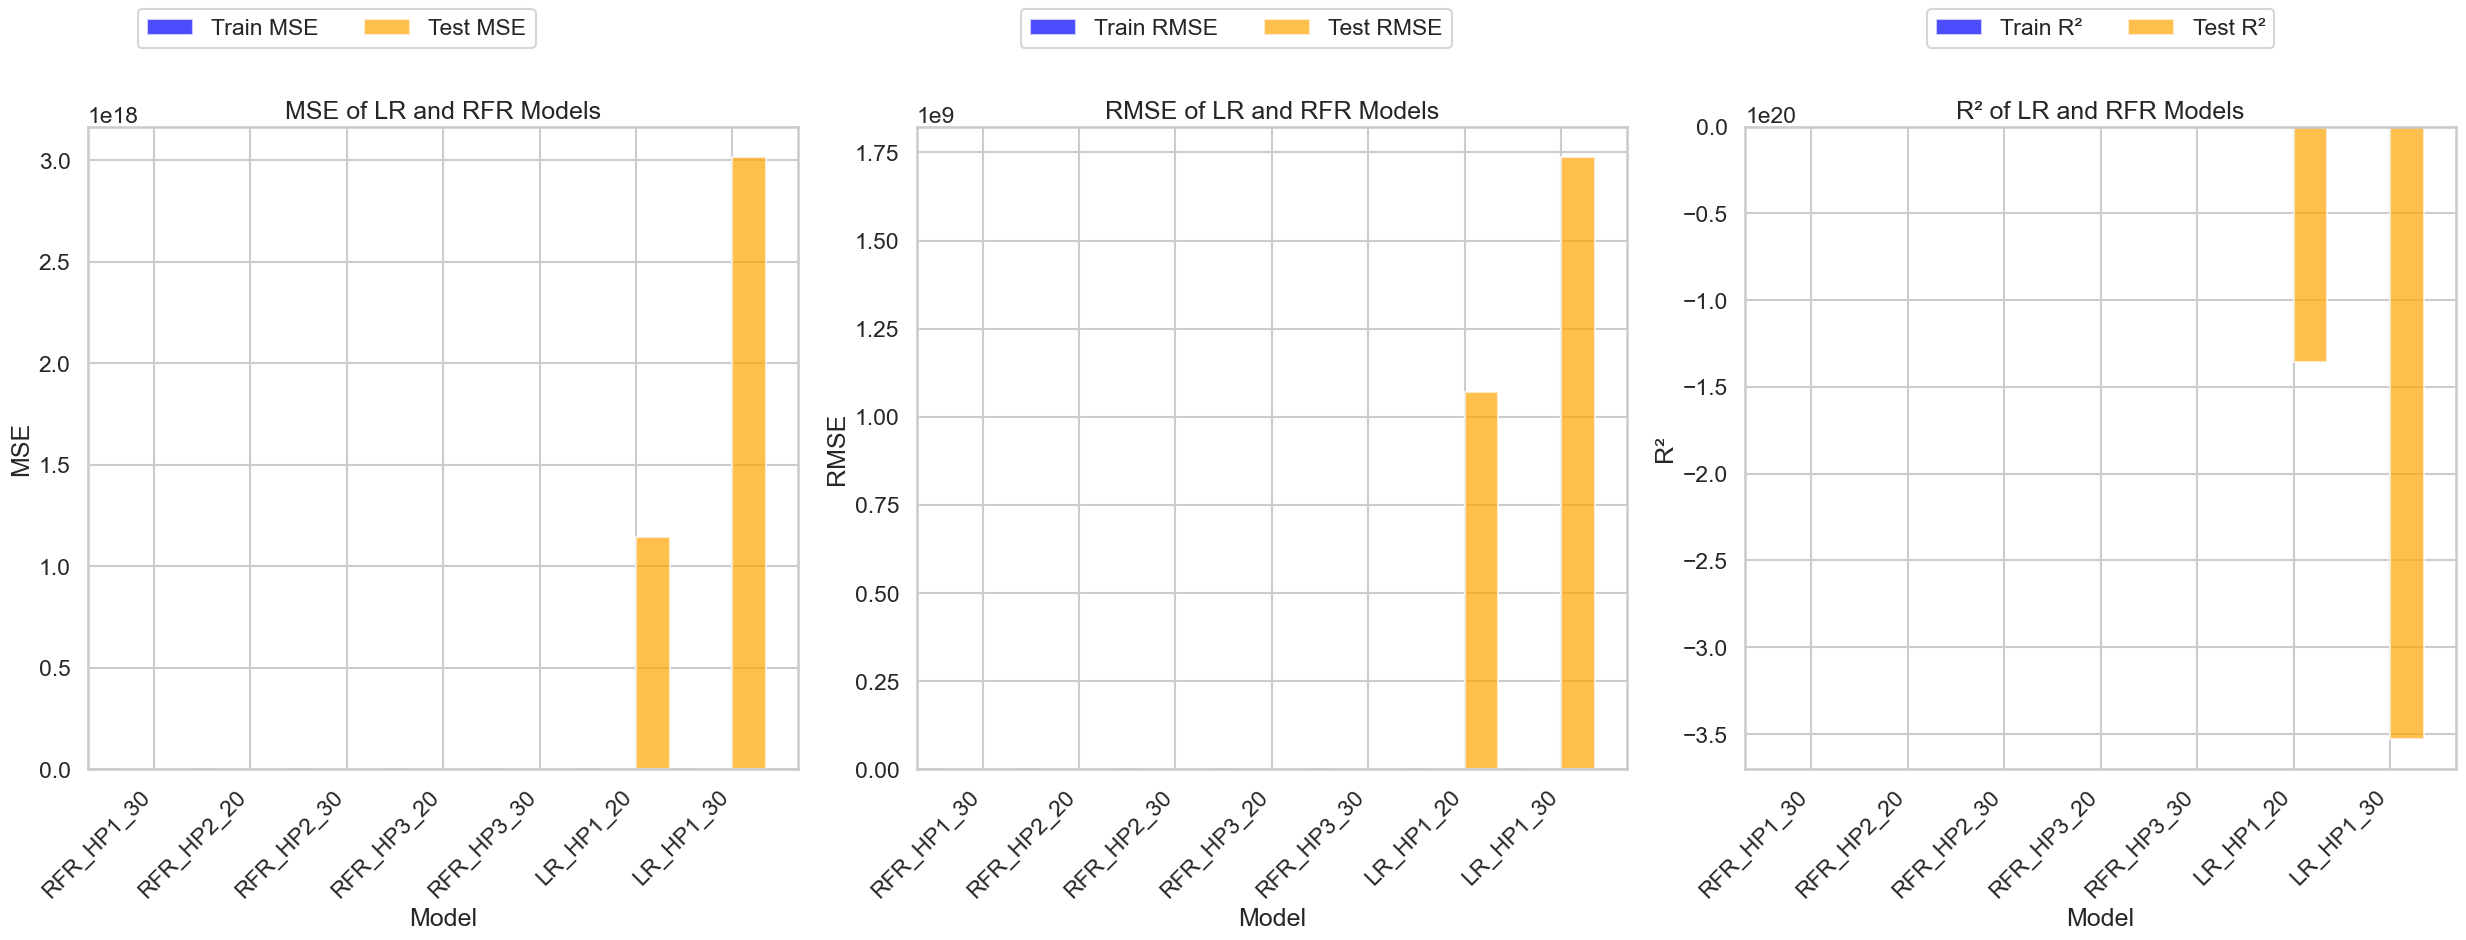

In [123]:
# get values from the filtered results
models_filtered = [result['Model'] for result in results]
mse_train_filtered = [result['MSE_train'] for result in results]
rmse_train_filtered = [result['RMSE_train'] for result in results]
r2_train_filtered = [result['r2_train'] for result in results]
mse_test_filtered = [result['MSE_test'] for result in results]
rmse_test_filtered = [result['RMSE_test'] for result in results]
r2_test_filtered = [result['r2_test'] for result in results]

plt.figure(figsize=(25, 10))
n = len(models_filtered) # number of models
bar_width = 0.35
index = np.arange(n)

# MSE plot
plt.subplot(1, 3, 1)
plt.bar(index, mse_train_filtered, bar_width, label="Train MSE", alpha=0.7, color='blue')
plt.bar(index + bar_width, mse_test_filtered, bar_width, label="Test MSE", alpha=0.7, color='orange')
plt.title("MSE of LR and RFR Models")
plt.xticks(index + bar_width / 2, models_filtered, rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("MSE")
plt.legend(loc='upper center', bbox_to_anchor=(0.35, 1.2), ncol=2)

# RMSE plot
plt.subplot(1, 3, 2)
plt.bar(index, rmse_train_filtered, bar_width, label="Train RMSE", alpha=0.7, color='blue')
plt.bar(index + bar_width, rmse_test_filtered, bar_width, label="Test RMSE", alpha=0.7, color='orange')
plt.title("RMSE of LR and RFR Models")
plt.xticks(index + bar_width / 2, models_filtered, rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.legend(loc='upper center', bbox_to_anchor=(0.45, 1.2), ncol=2) 

# R² plot
plt.subplot(1, 3, 3)
plt.bar(index, r2_train_filtered, bar_width, label="Train R²", alpha=0.7, color='blue')
plt.bar(index + bar_width, r2_test_filtered, bar_width, label="Test R²", alpha=0.7, color='orange')
plt.title("R² of LR and RFR Models")
plt.xticks(index + bar_width / 2, models_filtered, rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("R²")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)  
plt.tight_layout()
plt.show()

### Observations:

The LR model performs similarly on the training data for both 20/80 and 30/70 splits, explaining around 37% of the variance (R² ≈ 0.37). However, test performance deteriorates significantly, with negative R² values and high error metrics (MSE, RMSE). The 30/70 split exposes more data patterns the model cannot capture, resulting in worse performance.

#### Reasons for Poor Performance:
To summarize, these are the most likely reaons why LR performed so badly in test data:

- LR assumes a linear relationship, no multicollinearity, and normally distributed errors. Violations of these assumptions degrade accuracy.

- **Skewness**: In all features (e.g., Job Title: 10.14, Company Size: 1.29, etc) and the target variable impacts model stability.

- **Imbalances**: senior-level experience roles, mid-sized companies, and US/UK locations dominate etc. limiting generalization.

- The **20/80** split shows mild overfitting. The **30/70** split reveals the model’s inability to generalize due to unseen data patterns.

- Negative R² indicates the model performs worse than predicting the mean, highlighting poor fit and mismatched training/test distributions.

Poor performance stems from violated assumptions, skewed features, and imbalanced data. Let's move on to RFR, and evauate its performance, as it is our main chosen model.

### Model Performance Result Plot (Only RFR)

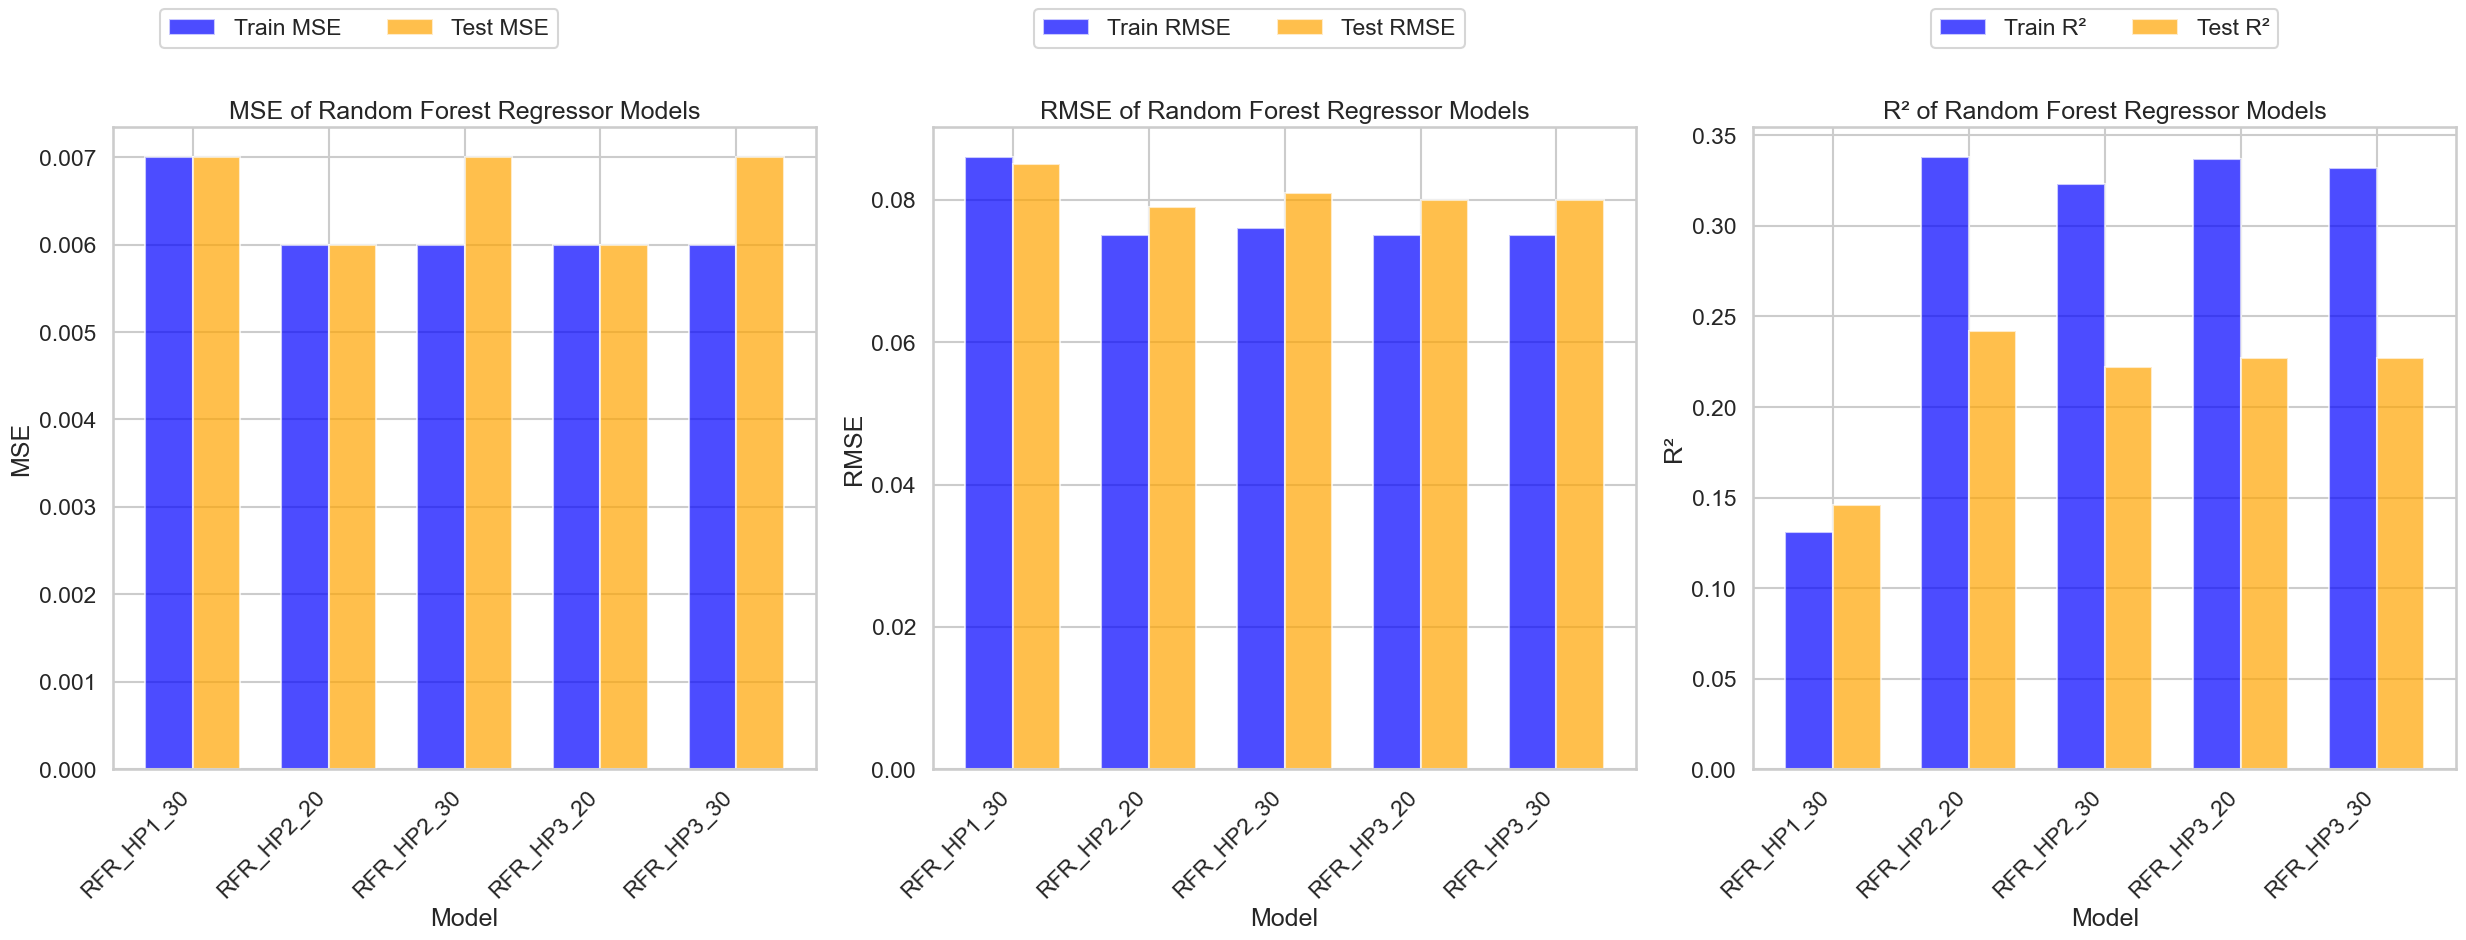

In [124]:
# filter out LR_1 and LR_2 models
filtered_rfr_results = [result for result in results if result['Model'] not in ['LR_HP1_20', 'LR_HP1_30']]

# get values from the filtered results
models_filtered_rfr = [result['Model'] for result in filtered_rfr_results]
mse_train_filtered_rfr = [result['MSE_train'] for result in filtered_rfr_results]
rmse_train_filtered_rfr = [result['RMSE_train'] for result in filtered_rfr_results]
r2_train_filtered_rfr = [result['r2_train'] for result in filtered_rfr_results]
mse_test_filtered_rfr = [result['MSE_test'] for result in filtered_rfr_results]
rmse_test_filtered_rfr = [result['RMSE_test'] for result in filtered_rfr_results]
r2_test_filtered_rfr = [result['r2_test'] for result in filtered_rfr_results]

plt.figure(figsize=(25, 10))
n = len(models_filtered_rfr) # number of models
bar_width = 0.35
index = np.arange(n)

# MSE plot
plt.subplot(1, 3, 1)
plt.bar(index, mse_train_filtered_rfr, bar_width, label="Train MSE", alpha=0.7, color='blue')
plt.bar(index + bar_width, mse_test_filtered_rfr, bar_width, label="Test MSE", alpha=0.7, color='orange')
plt.title("MSE of Random Forest Regressor Models")
plt.xticks(index + bar_width / 2, models_filtered_rfr, rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("MSE")
plt.legend(loc='upper center', bbox_to_anchor=(0.35, 1.2), ncol=2)

# RMSE plot
plt.subplot(1, 3, 2)
plt.bar(index, rmse_train_filtered_rfr, bar_width, label="Train RMSE", alpha=0.7, color='blue')
plt.bar(index + bar_width, rmse_test_filtered_rfr, bar_width, label="Test RMSE", alpha=0.7, color='orange')
plt.title("RMSE of Random Forest Regressor Models")
plt.xticks(index + bar_width / 2, models_filtered_rfr, rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.legend(loc='upper center', bbox_to_anchor=(0.45, 1.2), ncol=2) 

# R² plot
plt.subplot(1, 3, 3)
plt.bar(index, r2_train_filtered_rfr, bar_width, label="Train R²", alpha=0.7, color='blue')
plt.bar(index + bar_width, r2_test_filtered_rfr, bar_width, label="Test R²", alpha=0.7, color='orange')
plt.title("R² of Random Forest Regressor Models")
plt.xticks(index + bar_width / 2, models_filtered_rfr, rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("R²")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)  
plt.tight_layout()
plt.show()

### Observation:
#### RFR_HP1_30
- 30/70 test/train
- n_estimators = 1
- max_depth = 1

This model, with its minimal number of estimators and shallow depth, shows relatively low MSE values for both the training and test sets at 0.007, but there's still potential for improvement. Interestingly, the R² value for the training set (around 0.13) is lower than that of the test data (just below 0.15). Even the MSE and RMSE are slightly better on the test set. This is unique to RFR_HP1_30. This could indicate underfitting on the training set, where the model hasn't captured the underlying patterns in the data. The model's simplicity (only 1 estimator and 1 max depth) likely contributes to this, as it doesn't have enough complexity to learn effectively from the training data.

#### RFR_HP2_20
- 20/80 test/train
- n_estimators = 10
- max_depth = 10

In this configuration, RFR_HP2_20 outperforms all other RFR models across nearly all metrics. It achieves the lowest MSE and RMSE values for both the training and test datasets, while also delivering the highest R² scores, suggesting a strong likelihood that the salary predictions are accurate.

#### RFR_HP2_30
- 30/70 test/train
- n_estimators = 10
- max_depth = 10

This model is similar to `RFR_HP2_20` but uses a 30/70 split. The training performance is slightly worse than the 20/80 split model, with a lower R² of 0.323. The test performance is somewhat worse too, with an R² of around 0.22 which is 8% worse compared with `RFR_HP2_20`. The MSE and RMSE values are very similar to the 20/80 model, but the drop in test performance is even more noticeable. This could be due to the model overfitting more to the training data with the lower portion of training data (70%) and then making more test predictions.

This model is similar to `RFR_HP2_20`, but uses a 30/70 split. The training performance is slightly lower than the 20/80 split version, with a test R² of 0.242. Test performance also declines, with an R² of around 0.22, which is 8% worse than `RFR_HP2_20`. While the MSE and RMSE values are quite similar to the 20/80 model, the decrease in test performance is more apparent. This may be due to the model overfitting to the training data, as the reduced training set (70%) leads to less generalization and potentially more errors on the test set.

#### RFR_HP3_20
- 20/80 test/train
- n_estimators = 50
- max_depth = 15

Since this model has 50 estimators and a max depth of 15, which makes it more complex than HP1 and HP2 configurations. Its performance is quite similar to RFR_HP2_20 with a 20/80 split, showing slight improvements in terms of MSE and RMSE on the test data. However, the test R² still remains low at around 0.22, indicating that it does not generalize well to unseen data. While the model is more complex, it does not lead to a significant increase in performance.

#### RFR_HP3_30
- 30/70 test/train
- n_estimators = 50
- max_depth = 15

This model has the same configuration as `RFR_HP3_20`, but with a 30/70 test/train split. The performance on training data is quite similar to`RFR_HP3_20`, but the test performance drops slightly. The model still suffers from overfitting, as the R² on the test data is low, at 0.227. This model is likely too complex for the problem, and the increased training data (30/70 split) did not seem to provide much benefit in terms of generalization.

Except for `RFR_HP1_30`, we observe that both LR and RFR models generally perform better on the training data compared to the test data. This could be due to the models being more finely tuned to the training set, capturing its specific patterns and nuances. As a result, they may struggle to generalize as effectively to the test data, leading to a drop in performance when making predictions on unseen data.

## Best Model and Conclusion

These results further support the observation that increasing the number of estimators and tree depth does not significantly improve generalization to unseen data, despite these parameters being designed to handle more complex datasets. The model's performance is hindered by the inherent noise in the data (e.g., variability in company location and employee residence) and an imbalanced, skewed dataset (e.g., differences in experience levels and employment types). These factors contribute to overfitting. Additionally, the dataset contains large amounts of outliers which cannot be removed as that would remove a large chunk of the dataset.

Ultimately, the dataset's complexity, influenced by diverse salary trends across countries and intricate feature relationships, limits the model's overall performance. Among all models, **RFR_HP2_20** demonstrated the best results, achieving a reasonable balance between training and test performance:

- **Train R²**: At 0.338, it is the highest across all models, indicating a 34% likelihood of accurately predicting salaries relative to the mean. While still low, this surpasses simply predicting the mean salary.
- **Test R²**: Slightly lower at 0.242, it outperforms other models in generalizing to unseen data.
- **MSE and RMSE**: With the lowest MSE (0.006) and RMSE (0.079) on the test data, it indicates better accuracy and less error, meaning predictions are, on average, 8% incorrect.

# (Q6) 

## Bias-Variance Trade-offs in RFR and LR

The bias-variance trade-off is essential for understanding model performance in both Linear Regression (LR) and Random Forest Regressor (RFR).

- **Bias**: Refers to the error introduced by simplifying a complex real-world problem with an overly simplistic model. A high-bias model makes strong assumptions and may underfit, failing to capture the underlying data patterns (Tran, 2022).

- **Variance**: Refers to the error caused by a model being overly sensitive to fluctuations in the training data. A high-variance model may overfit, capturing noise and random fluctuations instead of true patterns, leading to poor generalization to new, unseen data (Tran, 2022).

### Random Forest Regressor (RFR)

For RFR, a model like `RFR_HP1_30`, with fewer estimators and shallow trees (low max_depth), may exhibit high bias and low variance. This results in poor performance, both in training and testing, as seen in the relatively low R² values (around 0.13 for training and 0.146 for testing). By increasing `n_estimators` and `max_depth` in models like `RFR_HP2_20`, the model improves its ability to capture patterns, resulting in lower MSE, RMSE, and higher R² on both training and test sets.

However, as complexity increases, the benefits start to diminish. Models like `RFR_HP3_20` and `RFR_HP3_30` offer a good balance between training and test performance, but the added complexity doesn’t significantly improve generalization. These models may begin to overfit, showing good performance on training data but limited improvement on the test set. The R² values of around 0.227 for both `RFR_HP2_30` and `RFR_HP3_30` on test data suggest that increasing complexity beyond a point does not provide substantial gains.

### Linear Regression (LR)

LR, being a simpler model, tends to have higher bias and lower variance compared to tree-based models like RFR. This is evident in the poor performance of `LR_HP1_20` and `LR_HP1_30`, where MSE and RMSE are excessively high, and R² values are negative. LR struggles to generalize to the test data, performing worse than just predicting the mean. This is due to LR’s inability to capture non-linear relationships in the data, highlighting a high-bias, low-variance situation that results in underfitting and poor test performance.

### Effect of Imbalanced Datasets

The bias-variance trade-off becomes even more significant when working with imbalanced datasets. Features like Employee Residence (e.g., United States, United Arab Emirates) and Job Titles (AI Engineer) exhibit extreme skewness, with skew values as high as 49.31 for certain categorical variables. Such imbalances make it harder for the model to generalize effectively. For example, in RFR, an overly sensitive model might overfit to specific patterns in the training data that don’t reflect the broader population, leading to poor test data performance.

# References

- Bobbitt, Z. (2020). Regression vs. Classification: What’s the Difference? [online] Statology. Available at: https://www.statology.org/regression-vs-classification/ [Accessed 19 Nov. 2024].

- ‌IBM (2021). Random Forest. [online] Ibm.com. Available at: https://www.ibm.com/topics/random-forest [Accessed 14 Nov. 2024].

- Bevans, R. (2020). Multiple Linear Regression | A Quick Guide (Examples). [online] Scribbr. Available at: https://www.scribbr.com/statistics/multiple-linear-regression/ [Accessed 14 Nov. 2024].

- ‌GeeksforGeeks (2020). ML Advantages and Disadvantages of Linear Regression. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/ml-advantages-and-disadvantages-of-linear-regression/ [Accessed 14 Nov. 2024].

- ‌Prabhakaran, S. (2022). Train Test Split - How to split data into train and test for validating machine learning models? - Machine Learning Plus. [online] Machine Learning Plus. Available at: https://www.machinelearningplus.com/machine-learning/train-test-split/ [Accessed 14 Nov. 2024].

- Lewinson, E. (2023). A Comprehensive Overview of Regression Evaluation Metrics | NVIDIA Technical Blog. [online] Available at: https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/ [Accessed 15 Nov. 2024].

- Bhandari, P. (2020). Ordinal Data | Definition, Examples, Data Collection & Analysis. [online] Scribbr. Available at: https://www.scribbr.com/statistics/ordinal-data/#:~:text=Ordinal%20variables%20are%20usually%20assessed%20using [Accessed 17 Nov. 2024].

- ‌Turney, S. (2022). Skewness | Definition, Examples & Formula. [online] Scribbr. Available at: https://www.scribbr.com/statistics/skewness/ [Accessed 18 Nov. 2024].

- ‌McShane, B. (2024). An Extensive Guide to Scaling as a Method of Data-Preprocessing. [online] Medium. Available at: https://medium.com/@broganmcshane.code/an-extensive-guide-to-scaling-as-a-method-of-data-preprocessing-be88b8f861f0 [Accessed 18 Nov. 2024].

- Admin (2023). Scikit-Learn’s preprocessing.MaxAbsScaler in Python (with Examples) | PythonProg. [online] PythonProg. Available at: https://www.pythonprog.com/sklearn-preprocessing-maxabsscaler/#:~:text=Benefits%20of%20Using%20MaxAbsScaler%201%20Preservation%20of%20Data,impact%20of%20the%20scaled%20data%20on%20your%20models. [Accessed 18 Nov. 2024].

- ‌scikit-learn. (2024). RandomForestRegressor. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html [Accessed 20 Nov. 2024].

- Balaji Nalawade (2024). The Essential Guide to K-Fold Cross-Validation in Machine Learning. [online] Medium. Available at: https://medium.com/@bididudy/the-essential-guide-to-k-fold-cross-validation-in-machine-learning-2bcb58c50578 [Accessed 20 Nov. 2024].

- Tran, M. (2022). A Visual Understanding of Bias and Variance - Towards Data Science. [online] Medium. Available at: https://towardsdatascience.com/a-visual-understanding-of-bias-and-variance-66179f16be32 [Accessed 21 Nov. 2024].
